# Exploratory Data Analysis

In [85]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats import spearmanr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="white")


Importing the final dataset.

In [3]:
df = pd.read_csv("../Data/final_dataset.csv")

## Data Quality

Looking at the distribution of null values in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryCode                      89 non-null     object 
 1   CountryName                      89 non-null     object 
 2   TourismEmploymentPer1000         89 non-null     float64
 3   FoodEmploymentPer1000            69 non-null     float64
 4   TourismGDPPercentage             69 non-null     float64
 5   BusinessToPersonalRatio          76 non-null     float64
 6   AverageStayDays                  76 non-null     float64
 7   InboundArrivalsPer1000           83 non-null     float64
 8   DomesticTouristsPer1000          58 non-null     float64
 9   InboundToOutboundRatio           60 non-null     float64
 10  CostOfLivingIndex                85 non-null     float64
 11  GroceriesCostIndex               85 non-null     float64
 12  RestaurantPriceIndex    

In [5]:
df.isnull().sum()

CountryCode                         0
CountryName                         0
TourismEmploymentPer1000            0
FoodEmploymentPer1000              20
TourismGDPPercentage               20
BusinessToPersonalRatio            13
AverageStayDays                    13
InboundArrivalsPer1000              6
DomesticTouristsPer1000            31
InboundToOutboundRatio             29
CostOfLivingIndex                   4
GroceriesCostIndex                  4
RestaurantPriceIndex                4
SafetyIndex                         1
HealthCareIndex                    23
PollutionIndex                     15
QualityOfLifeIndex                 27
ClimateIndex                       27
TrafficIndex                       26
TrafficTimeIndexMinutes            26
TrafficInefficiencyIndex           26
ReverseTrafficInefficiencyIndex    26
ReverseTrafficTimeIndexMinutes     26
ReverseTrafficIndex                26
ReversePollutionIndex              15
dtype: int64

<Axes: >

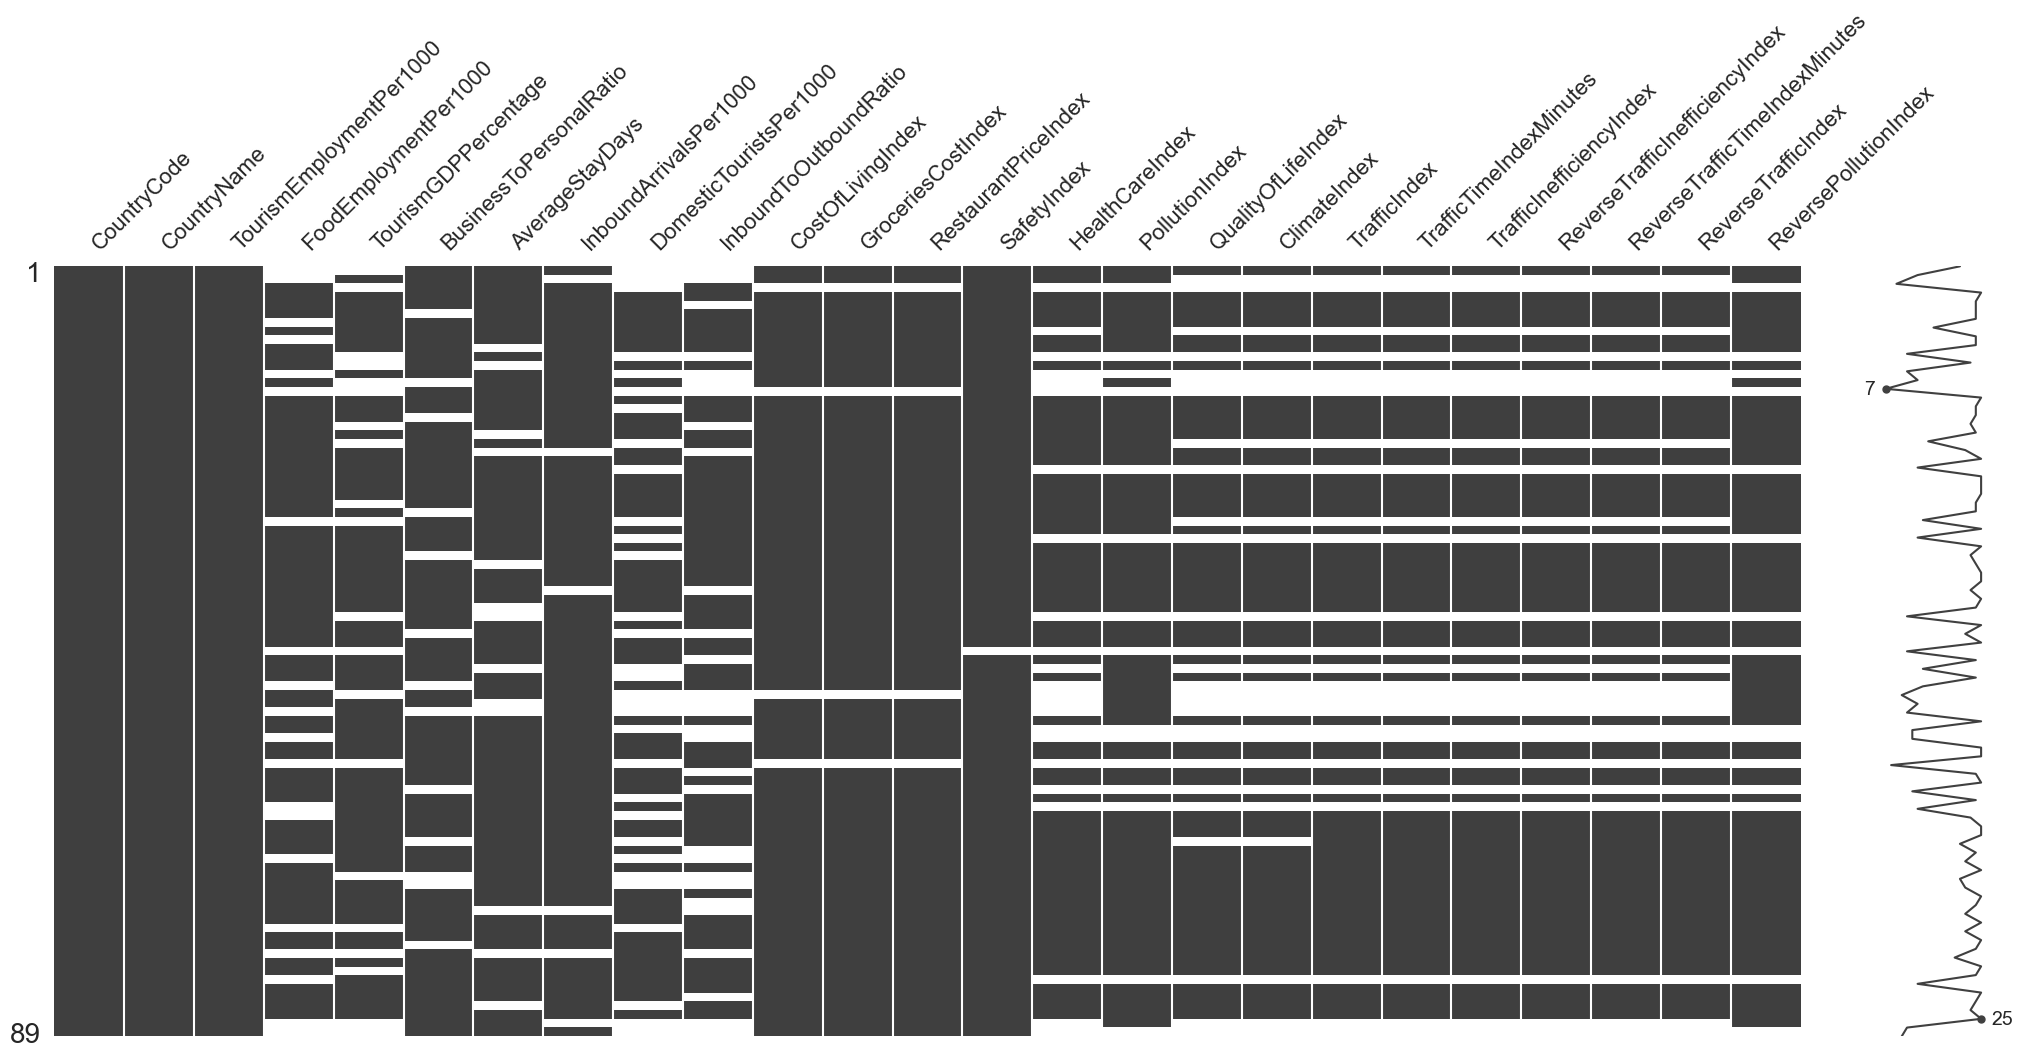

In [6]:
missingno.matrix(df)

In the worse case scenario, there are countries with as low as 7 features. The best case scenario is countries having all 25 features. 

In [7]:
df.duplicated().sum()

0

No duplicate entries found.

In [8]:
df.describe().T

count         mean          std        min  \
TourismEmploymentPer1000          89.0    25.639881    30.208117   0.864344   
FoodEmploymentPer1000             69.0    12.246579    11.200774   0.182560   
TourismGDPPercentage              69.0     3.578292     2.414450   0.061836   
BusinessToPersonalRatio           76.0     0.243344     0.302023   0.009091   
AverageStayDays                   76.0     4.094567     3.644277   1.330224   
InboundArrivalsPer1000            83.0   467.887608   810.467671   0.933245   
DomesticTouristsPer1000           58.0  1242.807826  1063.717487   0.153039   
InboundToOutboundRatio            60.0     2.337931     2.771569   0.197945   
CostOfLivingIndex                 85.0    41.295294    14.694038  19.000000   
GroceriesCostIndex                85.0    43.062353    15.575301  19.700000   
RestaurantPriceIndex              85.0    39.805882    17.910514  14.300000   
SafetyIndex                       88.0    57.170455    13.784334  25.300000   
HealthCareIndex                   66.0    65.942424     9.653171  46.800000   
PollutionIndex                    74.0    52.408108    20.979408  11.800000   
QualityOfLifeIndex                62.0   148.469355    38.510257  21.500000   
ClimateIndex                      62.0    79.388710    14.751072  39.800000   
TrafficIndex                      63.0   142.985714    50.194740  75.800000   
TrafficTimeIndexMinutes           63.0    35.171429     8.482761  21.400000   
TrafficInefficiencyIndex          63.0   170.600000    68.706118  70.500000   
ReverseTrafficInefficiencyIndex   63.0   276.700000    68.706118   0.000000   
ReverseTrafficTimeIndexMinutes    63.0    30.128571     8.482761   0.000000   
ReverseTrafficIndex               63.0   191.914286    50.194740   0.000000   
ReversePollutionIndex             74.0    41.291892    20.979408   0.000000   

                                        25%          50%          75%  \
TourismEmploymentPer1000           7.796310    19.709909    32.664306   
FoodEmploymentPer1000              4.457795     9.858471    16.525622   
TourismGDPPercentage               1.890788     3.104375     4.807650   
BusinessToPersonalRatio            0.075744     0.129049     0.294344   
AverageStayDays                    2.027468     2.596871     4.368941   
InboundArrivalsPer1000            41.244642   152.022395   579.640235   
DomesticTouristsPer1000          470.210368  1067.305597  1682.990724   
InboundToOutboundRatio             0.633283     1.470492     2.730327   
CostOfLivingIndex                 30.400000    38.800000    49.400000   
GroceriesCostIndex                33.200000    40.100000    54.500000   
RestaurantPriceIndex              27.200000    35.700000    49.500000   
SafetyIndex                       47.775000    55.700000    68.400000   
HealthCareIndex                   58.500000    66.700000    73.075000   
PollutionIndex                    36.800000    55.350000    67.950000   
QualityOfLifeIndex               124.100000   150.050000   178.725000   
ClimateIndex                      68.425000    83.050000    91.700000   
TrafficIndex                     107.000000   134.900000   170.300000   
TrafficTimeIndexMinutes           29.200000    35.200000    39.250000   
TrafficInefficiencyIndex         120.400000   161.500000   203.700000   
ReverseTrafficInefficiencyIndex  243.600000   285.800000   326.900000   
ReverseTrafficTimeIndexMinutes    26.050000    30.100000    36.100000   
ReverseTrafficIndex              164.600000   200.000000   227.900000   
ReversePollutionIndex             25.750000    38.350000    56.900000   

                                         max  
TourismEmploymentPer1000          197.352016  
FoodEmploymentPer1000              54.312951  
TourismGDPPercentage               11.728354  
BusinessToPersonalRatio             1.764563  
AverageStayDays                    22.250457  
InboundArrivalsPer1000           5825.335690  
DomesticTouristsPer1000          5157.844808  
Inbound

Features have very different scales, however by introducing the engineered "inverse"-like columns, all of them have a increasing monotone structure and meaning.

Looking at feature distribution.

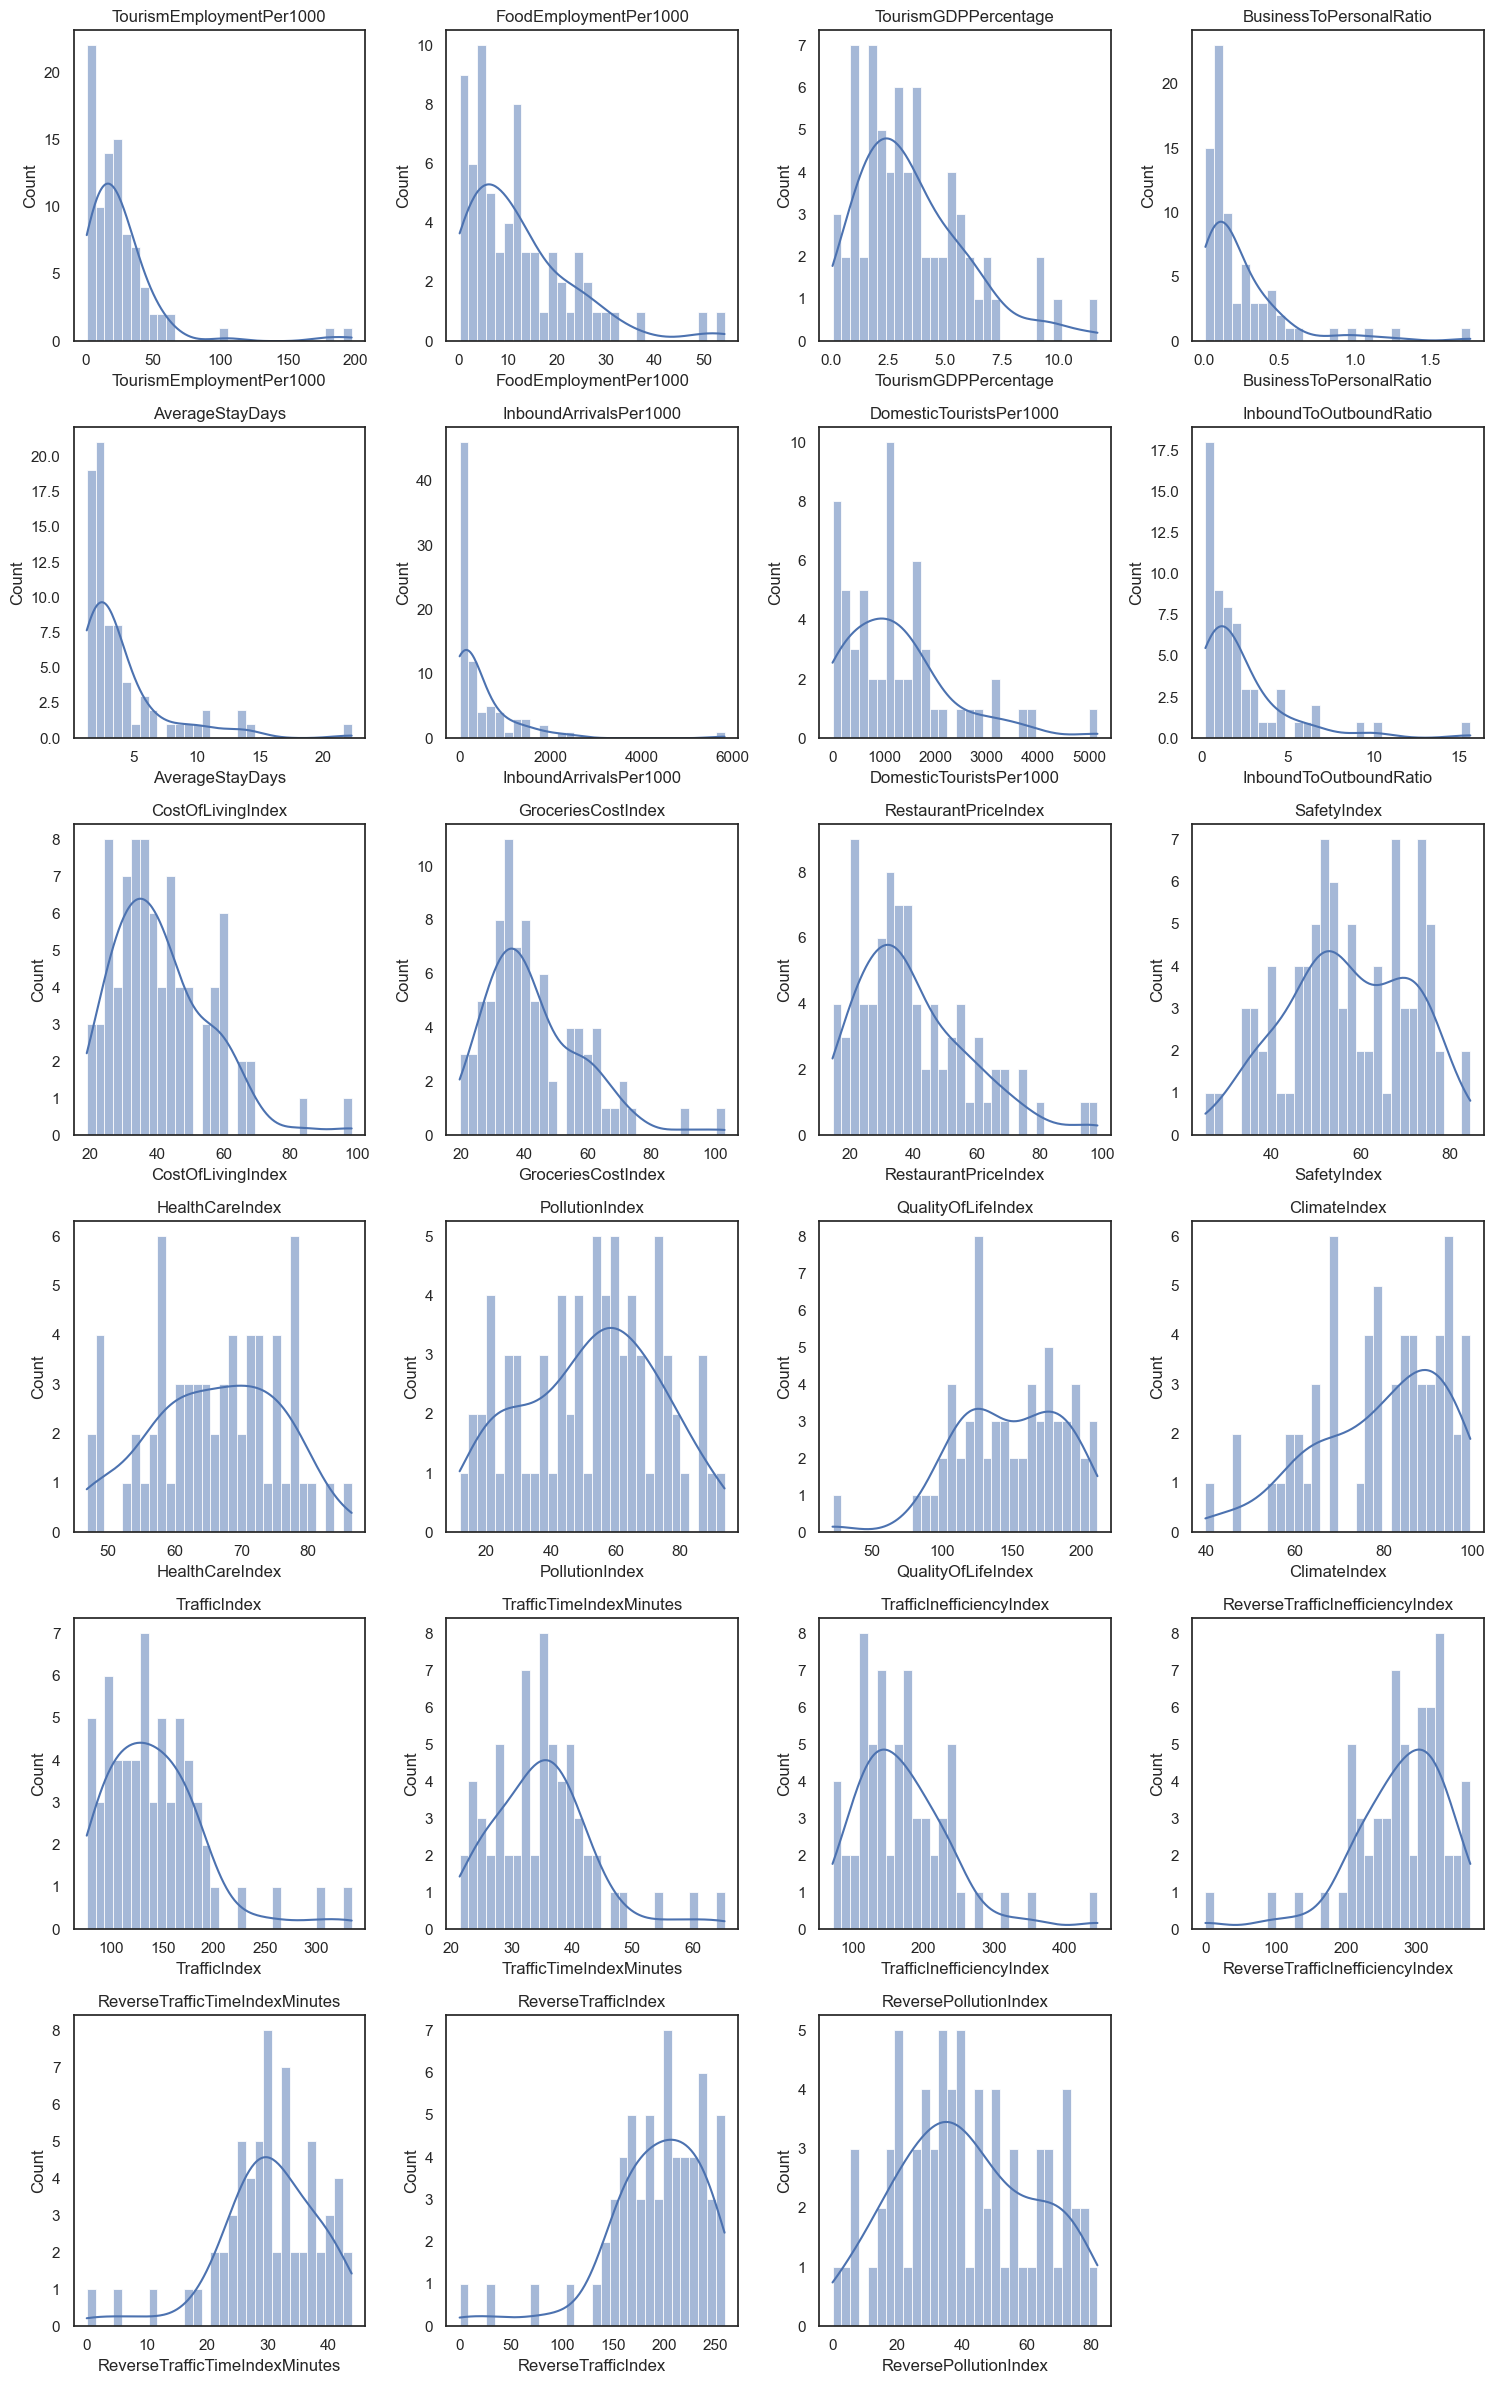

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Set up the number of rows and columns for subplots
num_features = len(numerical_columns)
num_cols = 4  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  

# Set up the figure size
plt.figure(figsize=(15, num_rows * 4))

# Loop through numerical columns and plot distributions
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

## Comparative Analysis

### Safety vs Healthcare

Comparing Safety Index and Healthcare Index and looking see if they are correlated.

In [10]:
# Select relevant columns and drop rows with NaN values in either column
subset = df[['CountryName', 'SafetyIndex', 'HealthCareIndex']].dropna()
print(subset.shape[0])

66


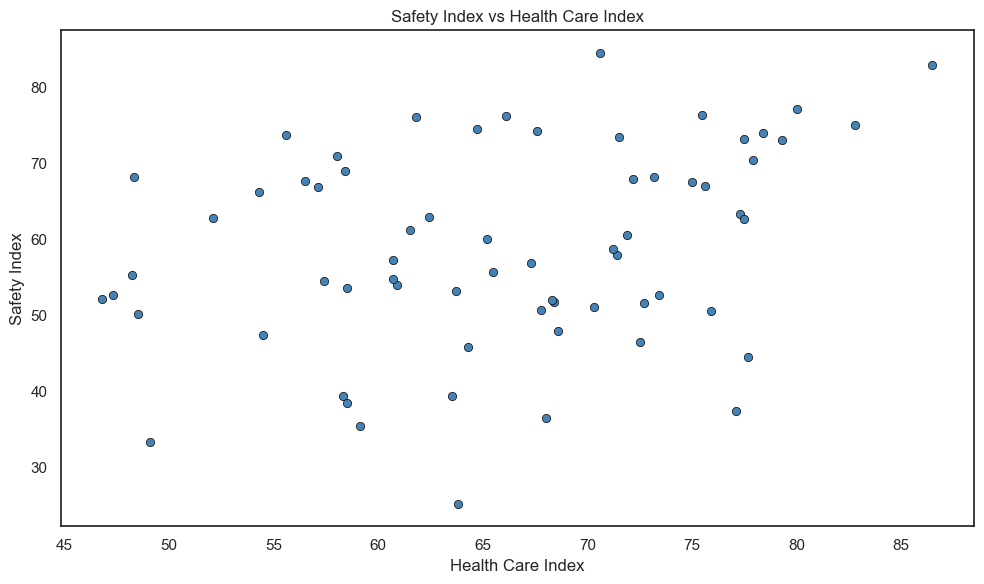

In [11]:
# Create a clearer scatter plot with uniform dot color
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    color='steelblue',
    edgecolor='black'
)
plt.title('Safety Index vs Health Care Index')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()

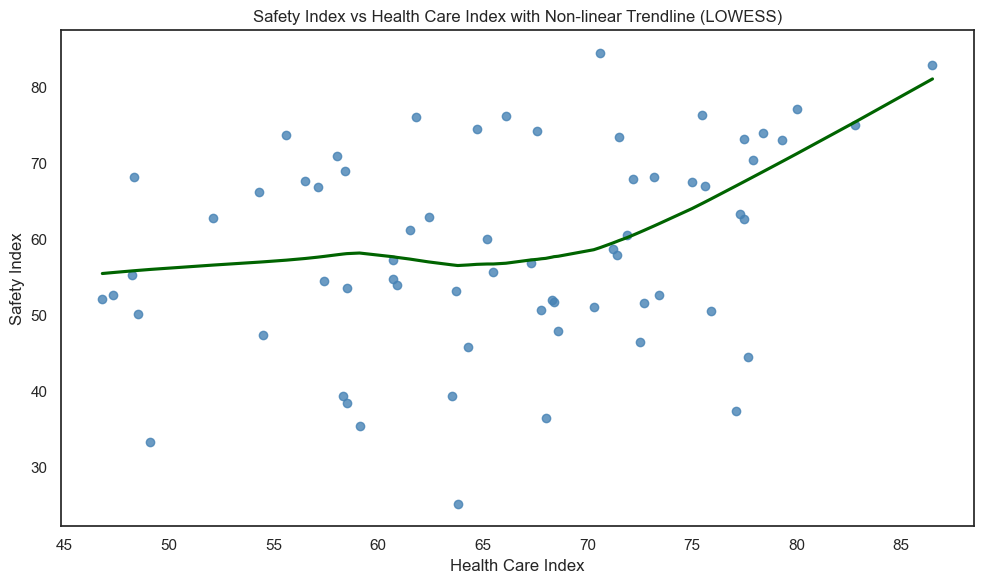

In [12]:
# Plot with non-linear trendline using lowess smoothing
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
nonlinear_plot = sns.regplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    scatter_kws={'color': 'steelblue'},
    line_kws={'color': 'darkgreen'},
    lowess=True
)
plt.title('Safety Index vs Health Care Index with Non-linear Trendline (LOWESS)')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()


In [13]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = spearmanr(subset['HealthCareIndex'], subset['SafetyIndex'])

# Round values
rounded_corr = round(corr_coef, 2)
rounded_p = round(p_value, 4)

# Interpret correlation strength with buffer ranges
if abs(rounded_corr) < 0.28:
    strength = "weak"
elif abs(rounded_corr) < 0.33:
    strength = "borderline weak-to-moderate"
elif abs(rounded_corr) < 0.57:
    strength = "moderate"
elif abs(rounded_corr) < 0.63:
    strength = "borderline moderate-to-strong"
else:
    strength = "strong"

# Interpret significance
if rounded_p < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

# Output
print(f"Pearson Correlation Coefficient: {rounded_corr}")
print(f"→ This indicates a {strength} positive correlation between Health Care Index and Safety Index.")

print(f"\nP-value: {rounded_p}")
print(f"→ Since it's {'below' if rounded_p < 0.05 else 'above'} 0.05, this correlation is {significance}.")

Pearson Correlation Coefficient: 0.28
→ This indicates a borderline weak-to-moderate positive correlation between Health Care Index and Safety Index.

P-value: 0.0248
→ Since it's below 0.05, this correlation is statistically significant.


In [ ]:
# Rank the data
ranked_data = subset[['CountryName', 'HealthCareIndex', 'SafetyIndex']].copy()
ranked_data['HealthCareRank'] = ranked_data['HealthCareIndex'].rank(ascending=False)
ranked_data['SafetyRank'] = ranked_data['SafetyIndex'].rank(ascending=False)
ranked_data['RankDifference'] = abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank'])

# Sort by difference for clarity in plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

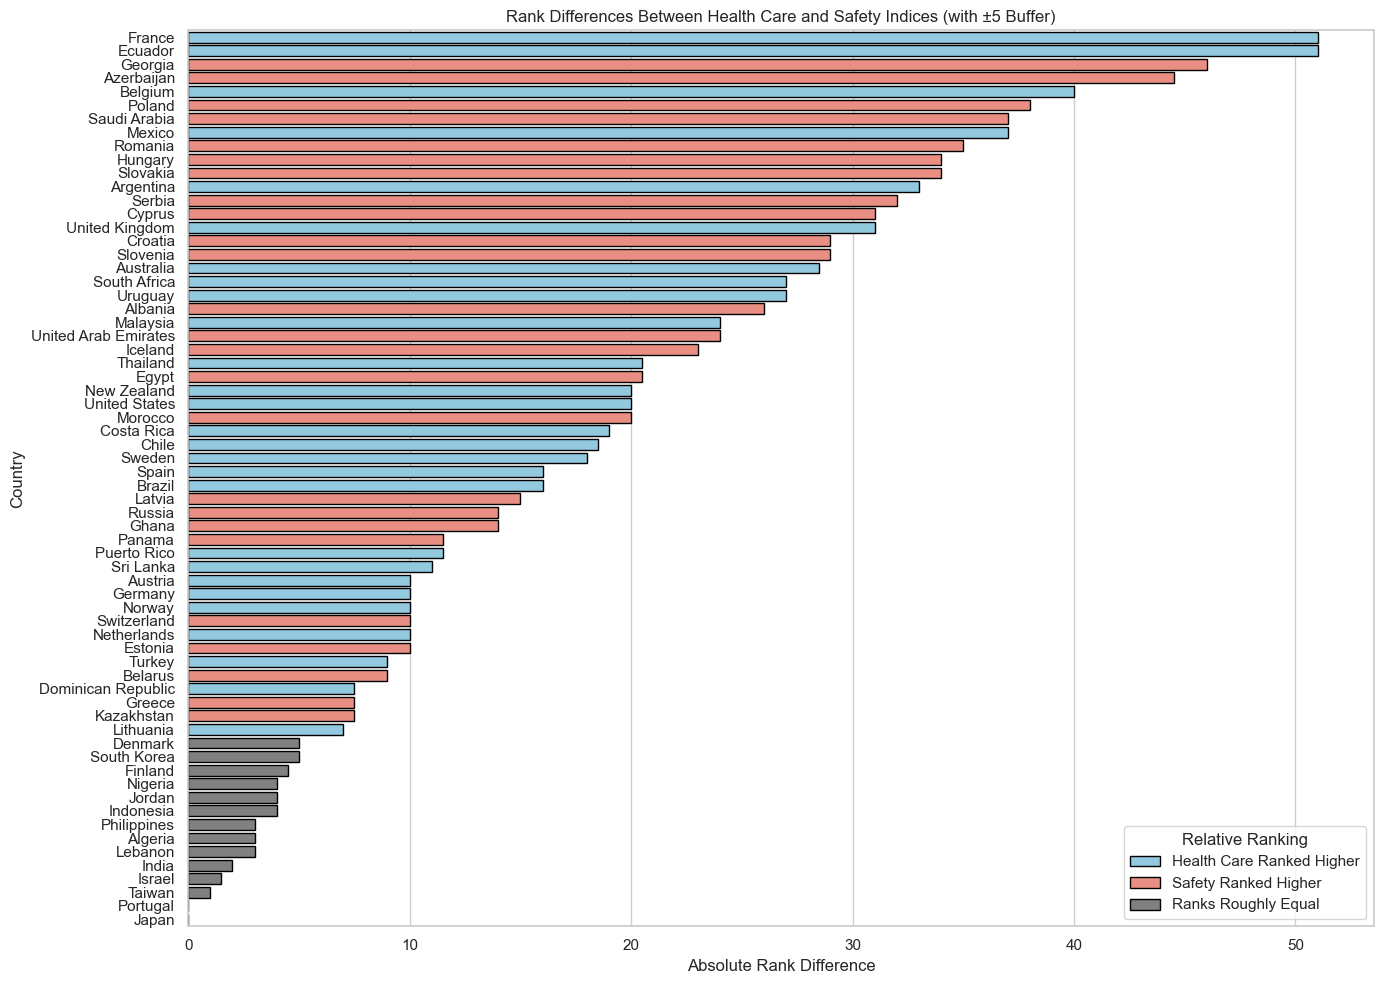

In [15]:
# Recalculate "Same Rank" using a buffer of ±5
ranked_data['HigherRankingBuffered'] = np.where(
    abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank']) <= 5,
    'Ranks Roughly Equal',
    np.where(
        ranked_data['HealthCareRank'] < ranked_data['SafetyRank'],
        'Health Care Ranked Higher',
        'Safety Ranked Higher'
    )
)

# Sort for plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

# Plot with buffered interpretation of rank similarity
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=ranked_data_sorted,
    x='RankDifference',
    y='CountryName',
    hue='HigherRankingBuffered',
    dodge=False,
    palette={
        'Health Care Ranked Higher': 'skyblue',
        'Safety Ranked Higher': 'salmon',
        'Ranks Roughly Equal': 'gray'
    },
    edgecolor='black'
)
plt.title('Rank Differences Between Health Care and Safety Indices (with ±5 Buffer)')
plt.xlabel('Absolute Rank Difference')
plt.ylabel('Country')
plt.legend(title='Relative Ranking')
plt.tight_layout()
plt.show()



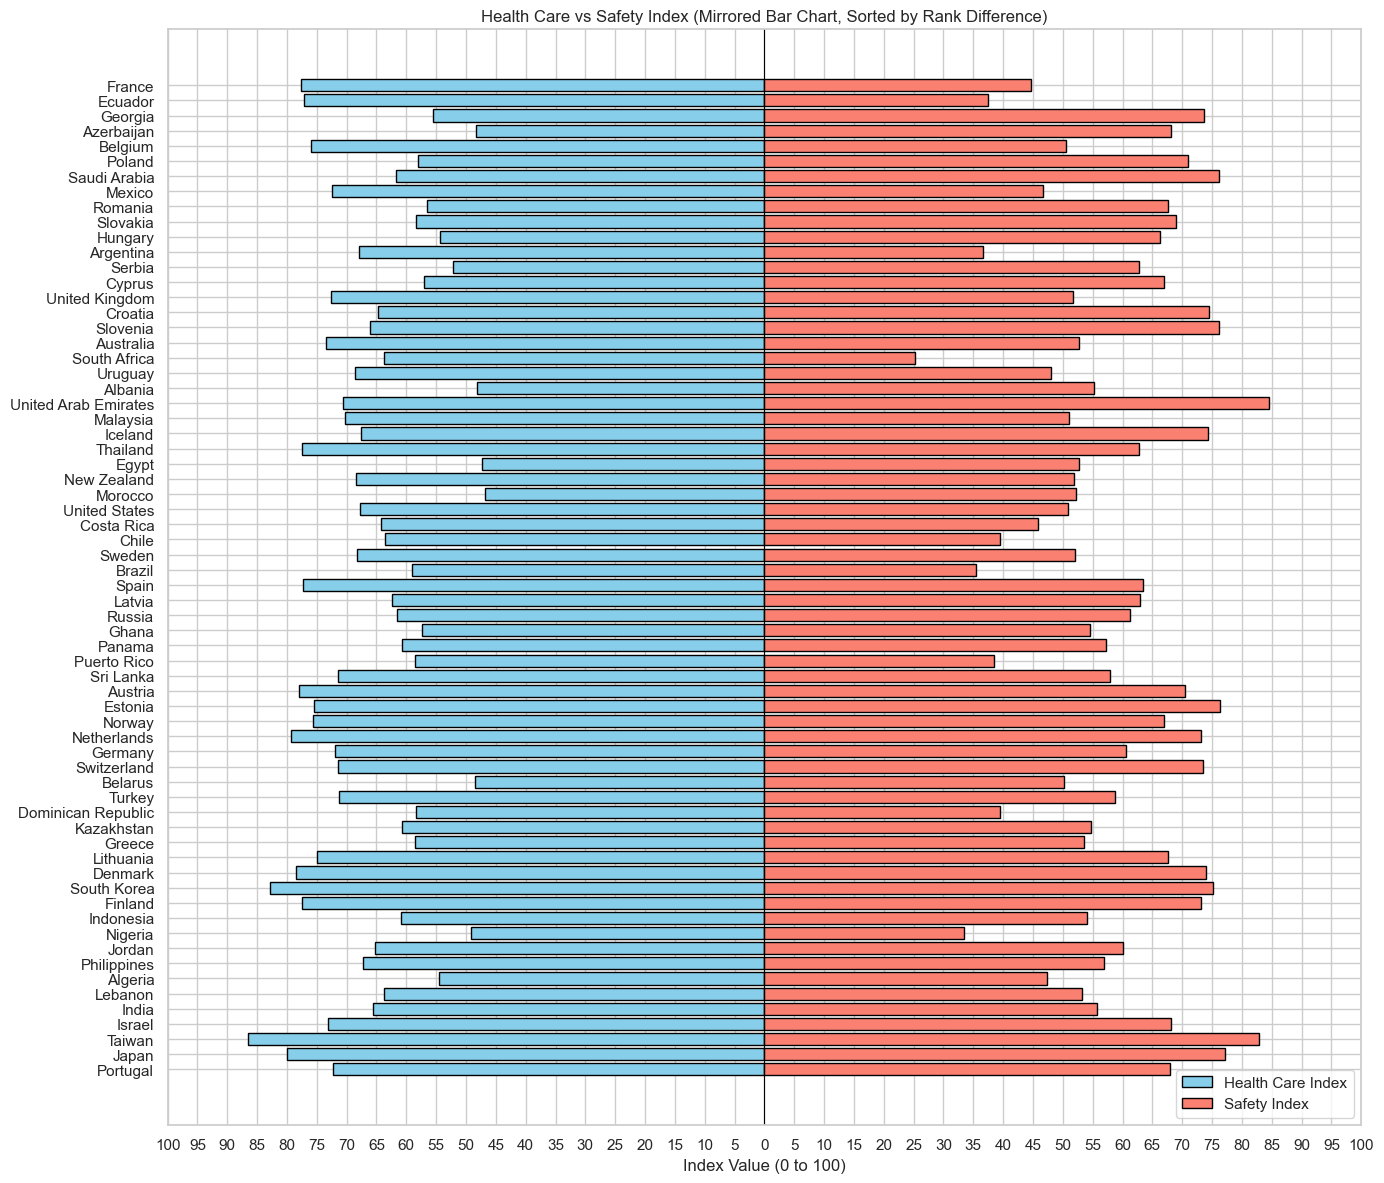

In [16]:
# Sort by the original absolute rank difference (as in the rank difference chart)
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=True)

# Plot mirrored bar chart using raw index values (no normalization)
plt.figure(figsize=(14, 12))
sns.set_theme(style="whitegrid")

# Left bars (Health Care Index) as negative
plt.barh(
    ranked_data_sorted['CountryName'],
    -ranked_data_sorted['HealthCareIndex'],
    color='skyblue',
    edgecolor='black',
    label='Health Care Index'
)

# Right bars (Safety Index)
plt.barh(
    ranked_data_sorted['CountryName'],
    ranked_data_sorted['SafetyIndex'],
    color='salmon',
    edgecolor='black',
    label='Safety Index'
)

# Update tick labels to show as positive, even on the negative side
xrange =range(-100, 101, 5)
plt.xticks(
    ticks=xrange,
    labels=[str(abs(x)) for x in xrange]
)


plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Index Value (0 to 100)')
plt.title('Health Care vs Safety Index (Mirrored Bar Chart, Sorted by Rank Difference)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Climate vs Quality vs Safety vs Pollution

c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


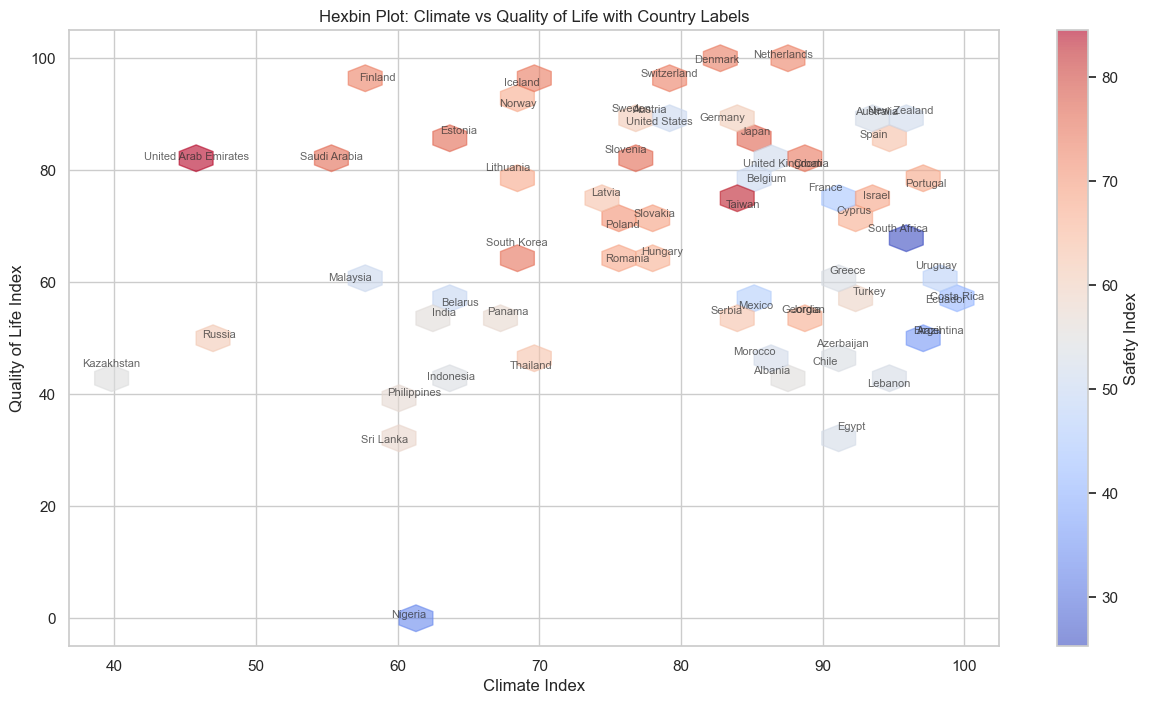

In [17]:
subset = df[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex', 'SafetyIndex', 'PollutionIndex']].dropna()

scaler = MinMaxScaler(feature_range=(0, 100))
subset['QualityOfLifeIndex'] = scaler.fit_transform(subset[['QualityOfLifeIndex']])

data = subset[['CountryName','ClimateIndex','QualityOfLifeIndex', 'SafetyIndex']]


plt.figure(figsize=(15, 8))
hb = plt.hexbin(
    data['ClimateIndex'], 
    data['QualityOfLifeIndex'], 
    data['SafetyIndex'],
    gridsize=25, cmap='coolwarm', alpha=0.6
)

for i, row in data.iterrows():
    plt.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=8, ha='center', alpha=0.7)

plt.colorbar(hb, label="Safety Index")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life with Country Labels")
plt.grid(True)
plt.show()


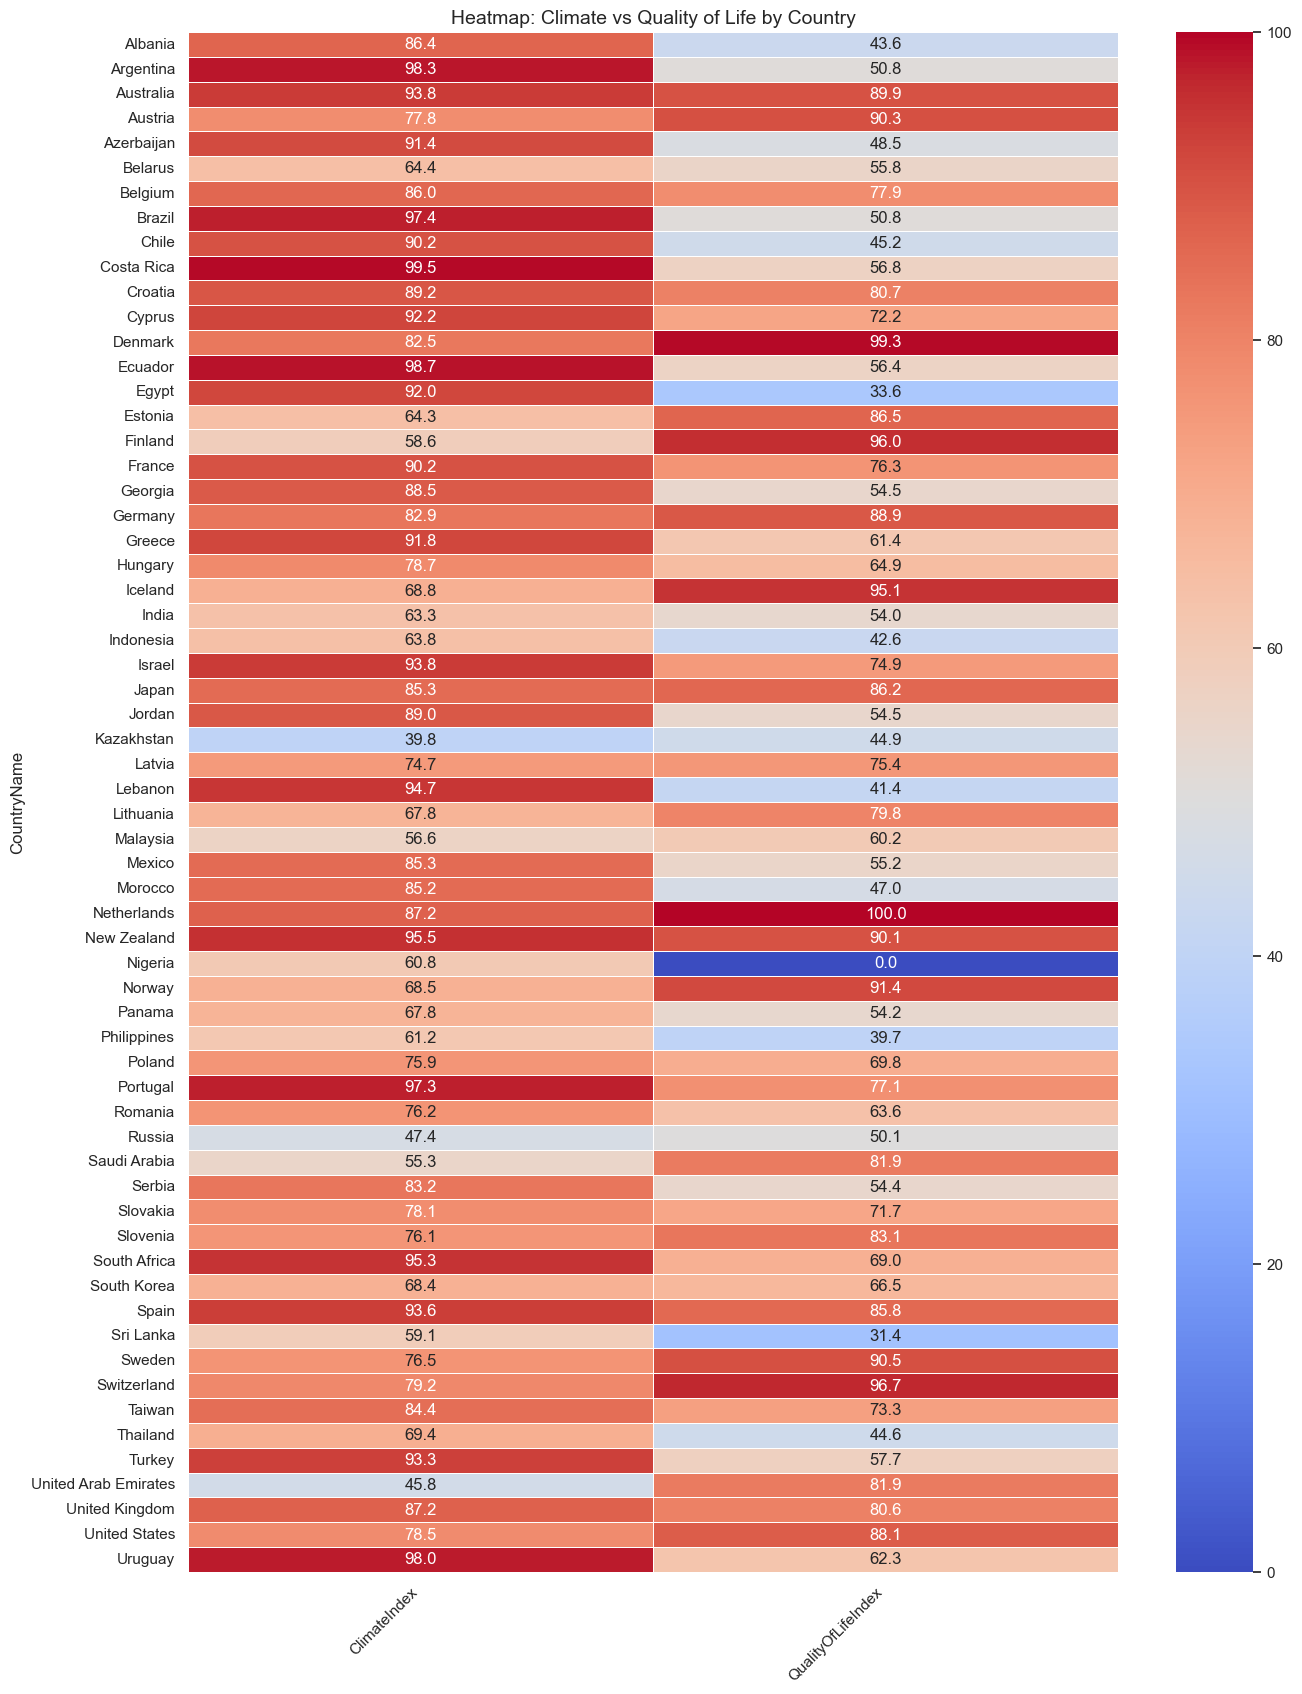

In [18]:
heatmap_data = subset[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex']]

heatmap_data.set_index('CountryName', inplace=True)

plt.figure(figsize=(15, 20))
sns.heatmap(
    heatmap_data, 
    cmap="coolwarm", 
    annot=True,  
    fmt=".1f",   
    linewidths=0.5
)

plt.title("Heatmap: Climate vs Quality of Life by Country", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


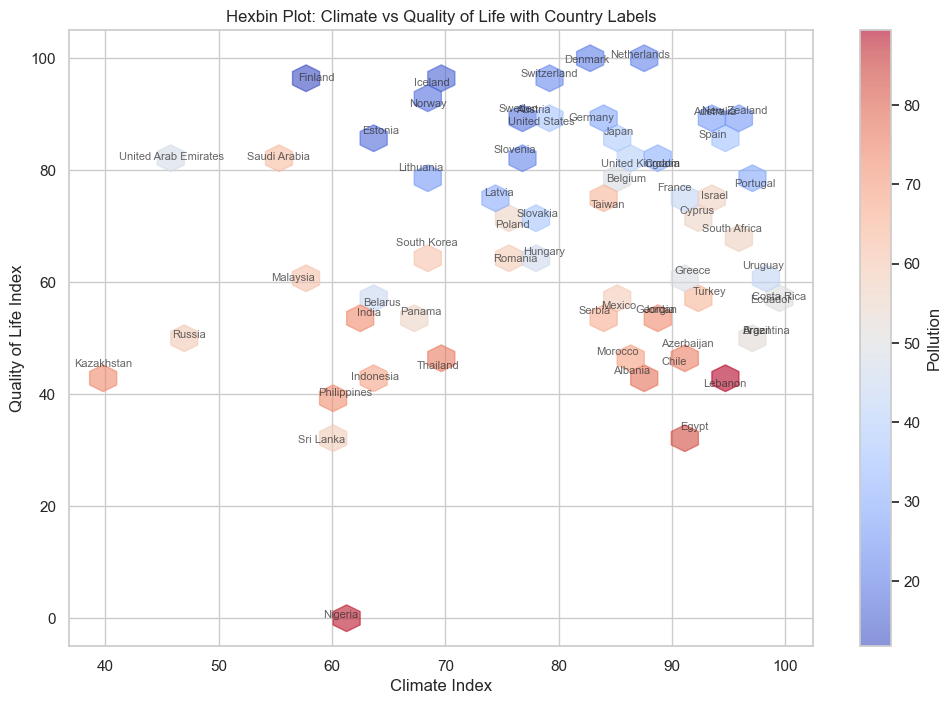

In [19]:
data = subset[['CountryName','ClimateIndex','QualityOfLifeIndex', 'PollutionIndex']]

plt.figure(figsize=(12, 8))
hb = plt.hexbin(
    data['ClimateIndex'], 
    data['QualityOfLifeIndex'], 
    data['PollutionIndex'],
    gridsize=25, cmap='coolwarm', alpha=0.6
)

for i, row in data.iterrows():
    plt.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=8, ha='center', alpha=0.7)

plt.colorbar(hb, label="Pollution")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life with Country Labels")
plt.grid(True)
plt.show()


### Safety vs Average Stay

In [20]:
subset = df[['CountryName', 'SafetyIndex', 'AverageStayDays']].dropna()
scaler = MinMaxScaler(feature_range = (0,100))
subset[['ScaledSafetyIndex', 'ScaledAverageStay']] = scaler.fit_transform(subset[['SafetyIndex', 'AverageStayDays']])

In [21]:
# Correlation between scaled variables
correlation = subset['ScaledAverageStay'].corr(subset['ScaledSafetyIndex'])
print('Correlation between Scaled Average Stay and Scaled Safety Index:', correlation)

Correlation between Scaled Average Stay and Scaled Safety Index: -0.258646774810228


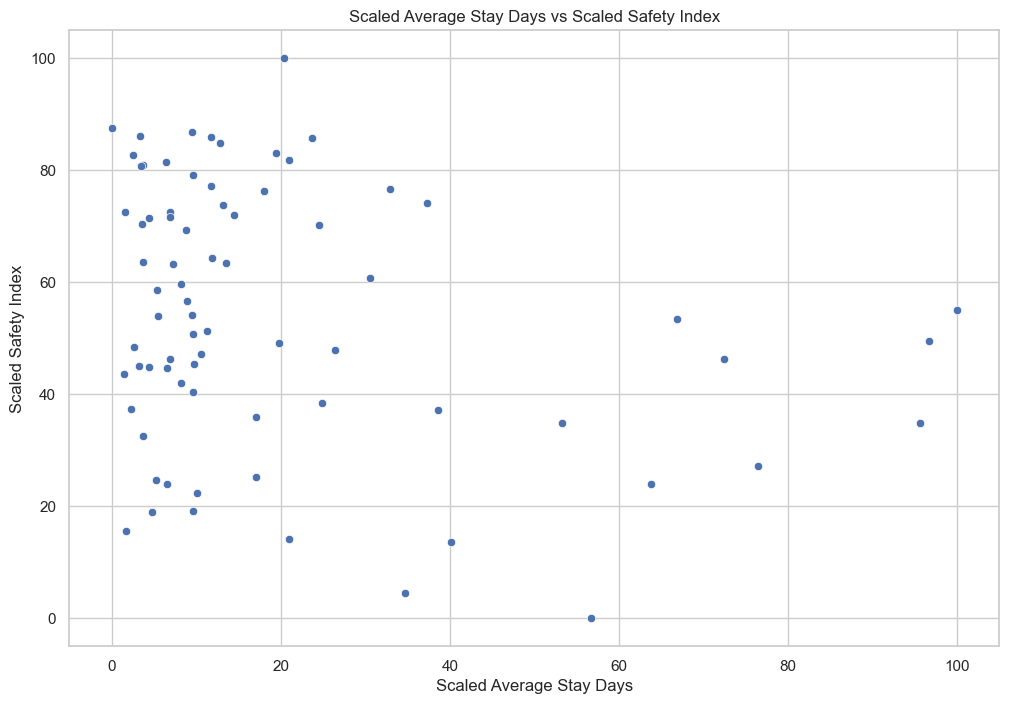

In [22]:
# %%
# Scatter plot with scaled data
plt.figure(figsize=(12, 8))

sns.scatterplot(x=subset['ScaledAverageStay'], y=subset['ScaledSafetyIndex'])
plt.title('Scaled Average Stay Days vs Scaled Safety Index')
plt.xlabel('Scaled Average Stay Days')
plt.ylabel('Scaled Safety Index')
plt.show()


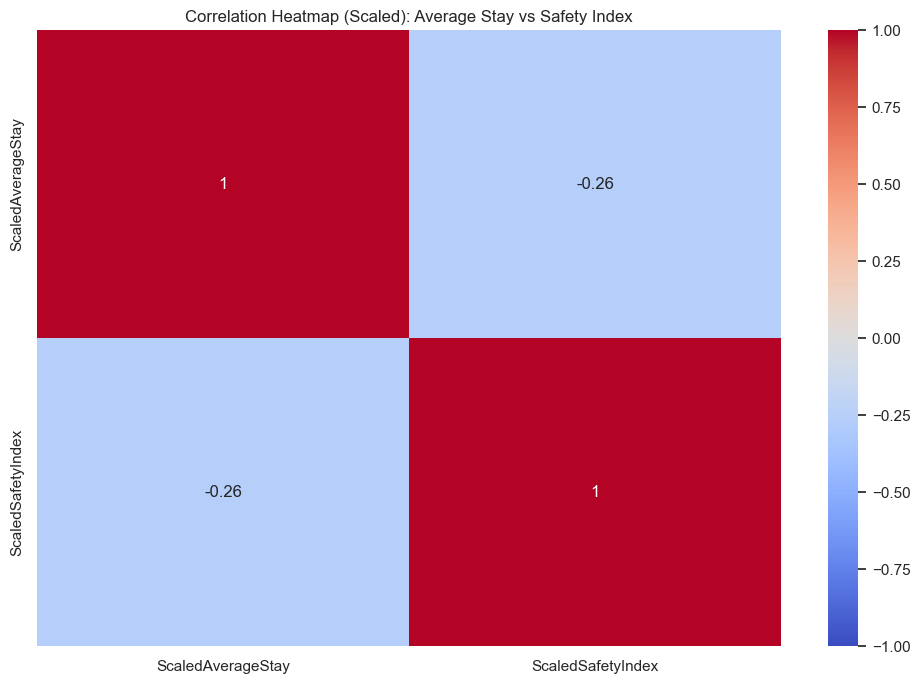

In [23]:
# %%
# Correlation heatmap (scaled)
corr = subset[['ScaledAverageStay', 'ScaledSafetyIndex']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Scaled): Average Stay vs Safety Index')
plt.show()


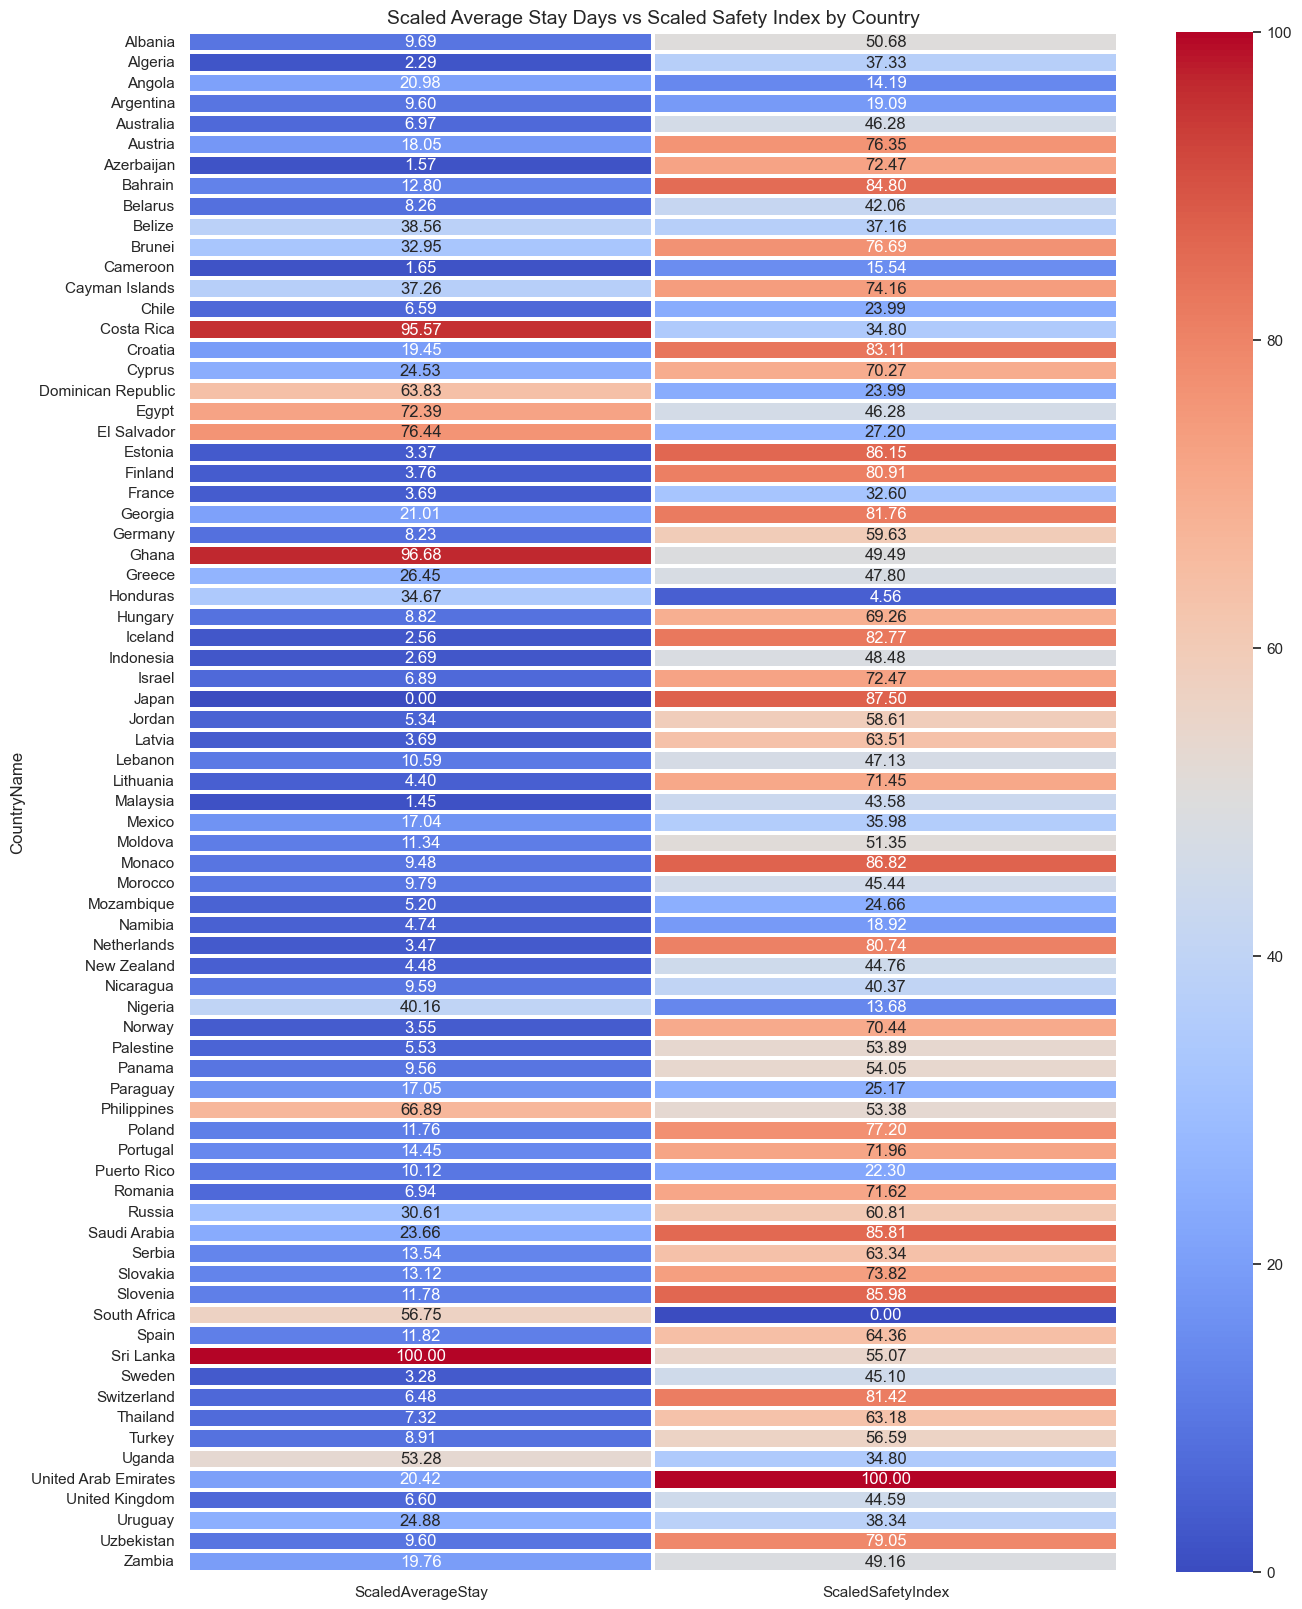

In [24]:
# %%
# Country-wise heatmap using scaled values
heatmap_data = subset[['CountryName', 'ScaledAverageStay', 'ScaledSafetyIndex']].copy()
heatmap_data.set_index('CountryName', inplace=True)

plt.figure(figsize=(15, 20))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=1.5
)
plt.title("Scaled Average Stay Days vs Scaled Safety Index by Country", fontsize=14)
plt.show()


### Overall Correlation Analysis 

Because our numerical features are not normally distributed, we will use Spearman rank correlation.

In [45]:
df.columns

Index(['CountryCode', 'CountryName', 'TourismEmploymentPer1000',
       'FoodEmploymentPer1000', 'TourismGDPPercentage',
       'BusinessToPersonalRatio', 'AverageStayDays', 'InboundArrivalsPer1000',
       'DomesticTouristsPer1000', 'InboundToOutboundRatio',
       'CostOfLivingIndex', 'GroceriesCostIndex', 'RestaurantPriceIndex',
       'SafetyIndex', 'HealthCareIndex', 'PollutionIndex',
       'QualityOfLifeIndex', 'ClimateIndex', 'TrafficIndex',
       'TrafficTimeIndexMinutes', 'TrafficInefficiencyIndex',
       'ReverseTrafficInefficiencyIndex', 'ReverseTrafficTimeIndexMinutes',
       'ReverseTrafficIndex', 'ReversePollutionIndex'],
      dtype='object')

In [123]:
all_numerical_features_df = df.copy()
all_numerical_features_df.drop(columns=["CountryName","CountryCode", "TrafficIndex", "TrafficTimeIndexMinutes","TrafficInefficiencyIndex", "PollutionIndex"], inplace=True)

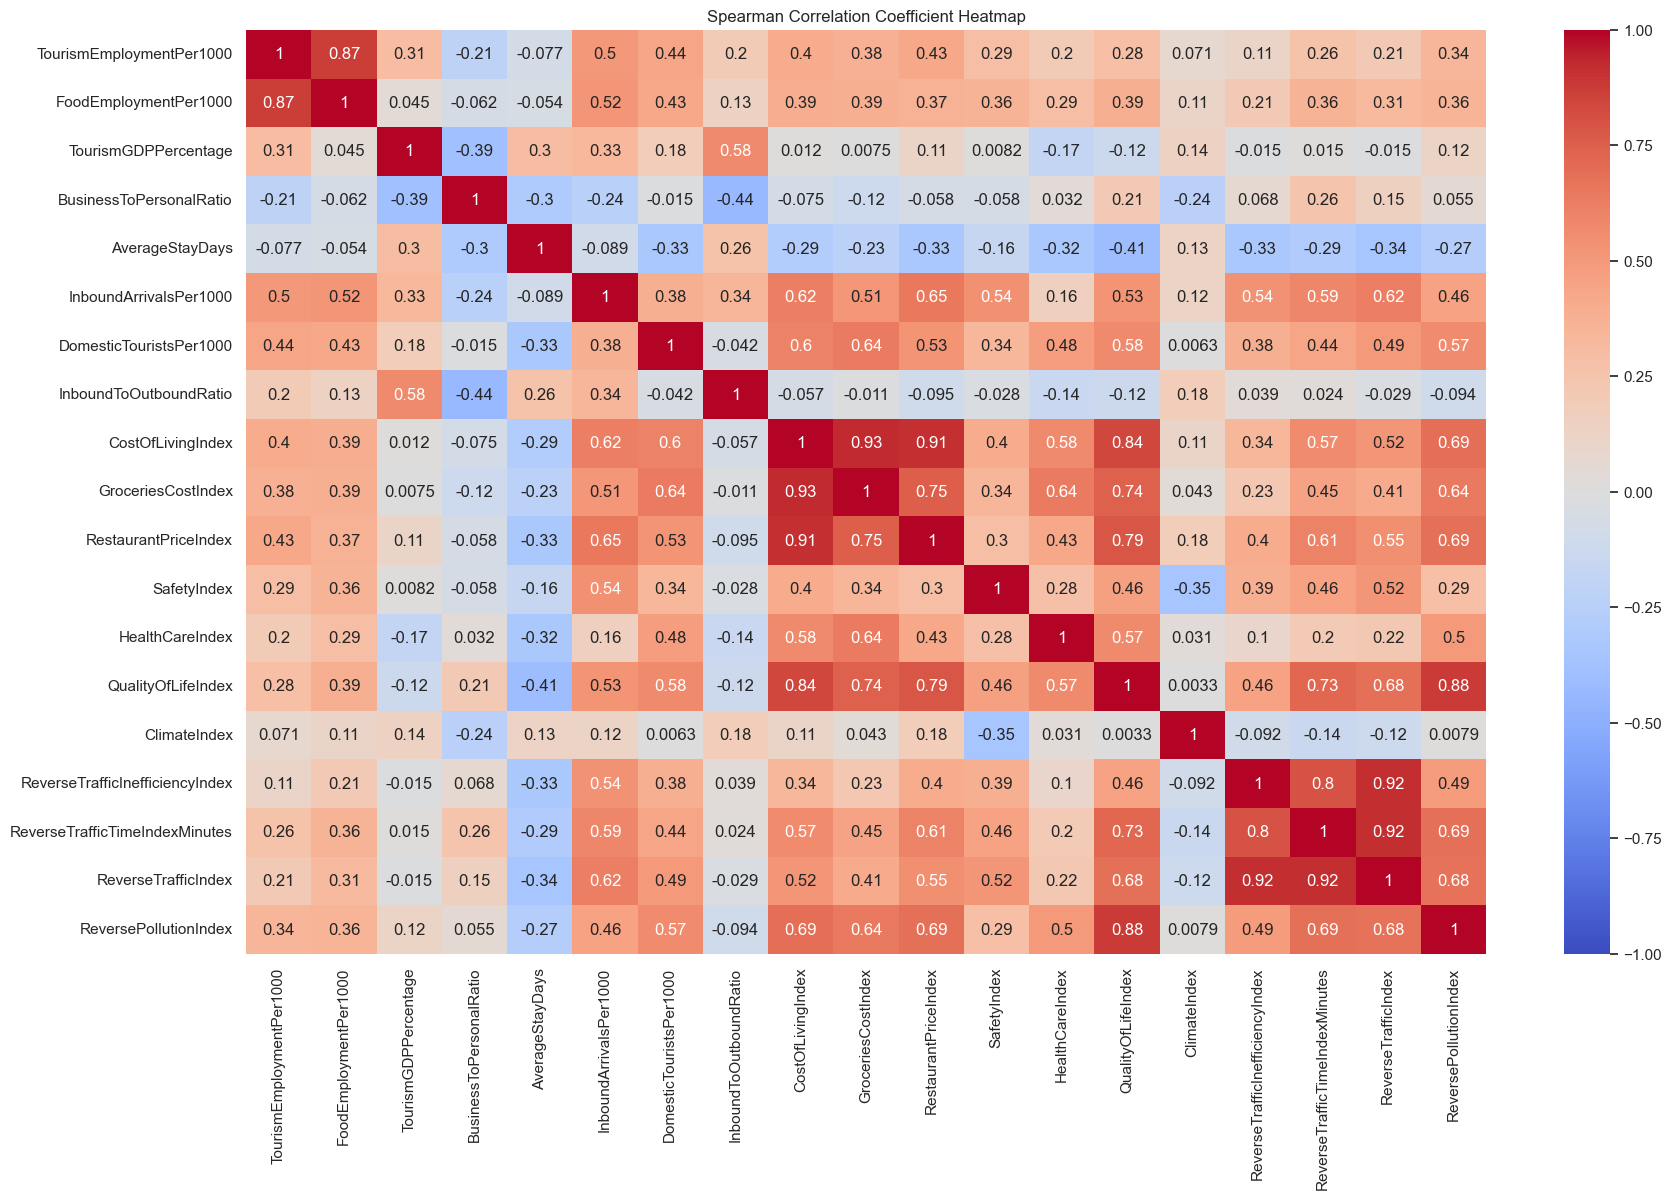

In [124]:
columns = all_numerical_features_df.columns
n = len(columns)

# Empty DataFrames
spearman_corr_df = pd.DataFrame(np.zeros((n, n)), columns=columns, index=columns)

# Compute pairwise correlations
for i in range(n):
    for j in range(n):
        col1 = columns[i]
        col2 = columns[j]
        rho, p = spearmanr(all_numerical_features_df[col1], all_numerical_features_df[col2], nan_policy='omit')
        spearman_corr_df.loc[col1, col2] = rho
plt.figure(figsize=(20, 12))
sns.heatmap(spearman_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Coefficient Heatmap')
plt.show()

To check for statistical relevance, because we have less than the recommended sample side in our data (500), we will use permutation testing. 

In [ ]:
def permutation_test_spearman(x, y, n_permutations=1000, random_state=None):
    rng = np.random.default_rng(random_state)
    
    # Actual correlation with nan_policy='omit'
    rho_actual, _ = spearmanr(x, y, nan_policy='omit')

    # Null distribution via permutations (with a progress bar)
    rhos_perm = np.zeros(n_permutations)
    for i in tqdm(range(n_permutations), desc="Permutations", leave=False):  # Add progress bar here
        y_perm = rng.permutation(y)
        rho, _ = spearmanr(x, y_perm, nan_policy='omit')
        rhos_perm[i] = rho

    # Two-sided p-value
    p_value = np.mean(np.abs(rhos_perm) >= np.abs(rho_actual))

    return rho_actual, p_value

In [ ]:

# columns = list(all_numerical_features_df.columns)
# n = len(columns)

# # Empty DataFrames
# perm_corr_df = pd.DataFrame(np.zeros((n, n)), columns=columns, index=columns)
# perm_pval_df = pd.DataFrame(np.ones((n, n)), columns=columns, index=columns)

# # Iterate over each pair of columns with a progress bar
# for i in tqdm(range(n), desc="Columns", leave=False):  # Progress bar for columns
#     for j in range(i, n):
#         col1 = columns[i]
#         col2 = columns[j]
#         x = all_numerical_features_df[col1].values
#         y = all_numerical_features_df[col2].values

#         # Run the permutation test
#         rho, p = permutation_test_spearman(x, y, n_permutations=1000)
#         perm_corr_df.loc[col1, col2] = rho
#         perm_corr_df.loc[col2, col1] = rho
#         perm_pval_df.loc[col1, col2] = p
#         perm_pval_df.loc[col2, col1] = p


Because the process is quite time consuming we will save the results and import them for further plotting and usage.

In [ ]:
# perm_corr_df.to_csv('../data/spearman_correlations.csv')
# perm_pval_df.to_csv('../data/spearman_pvalues.csv')

In [ ]:
perm_corr_df = pd.read_csv('spearman_correlations.csv', index_col=0)
perm_pval_df = pd.read_csv('spearman_pvalues.csv', index_col=0)

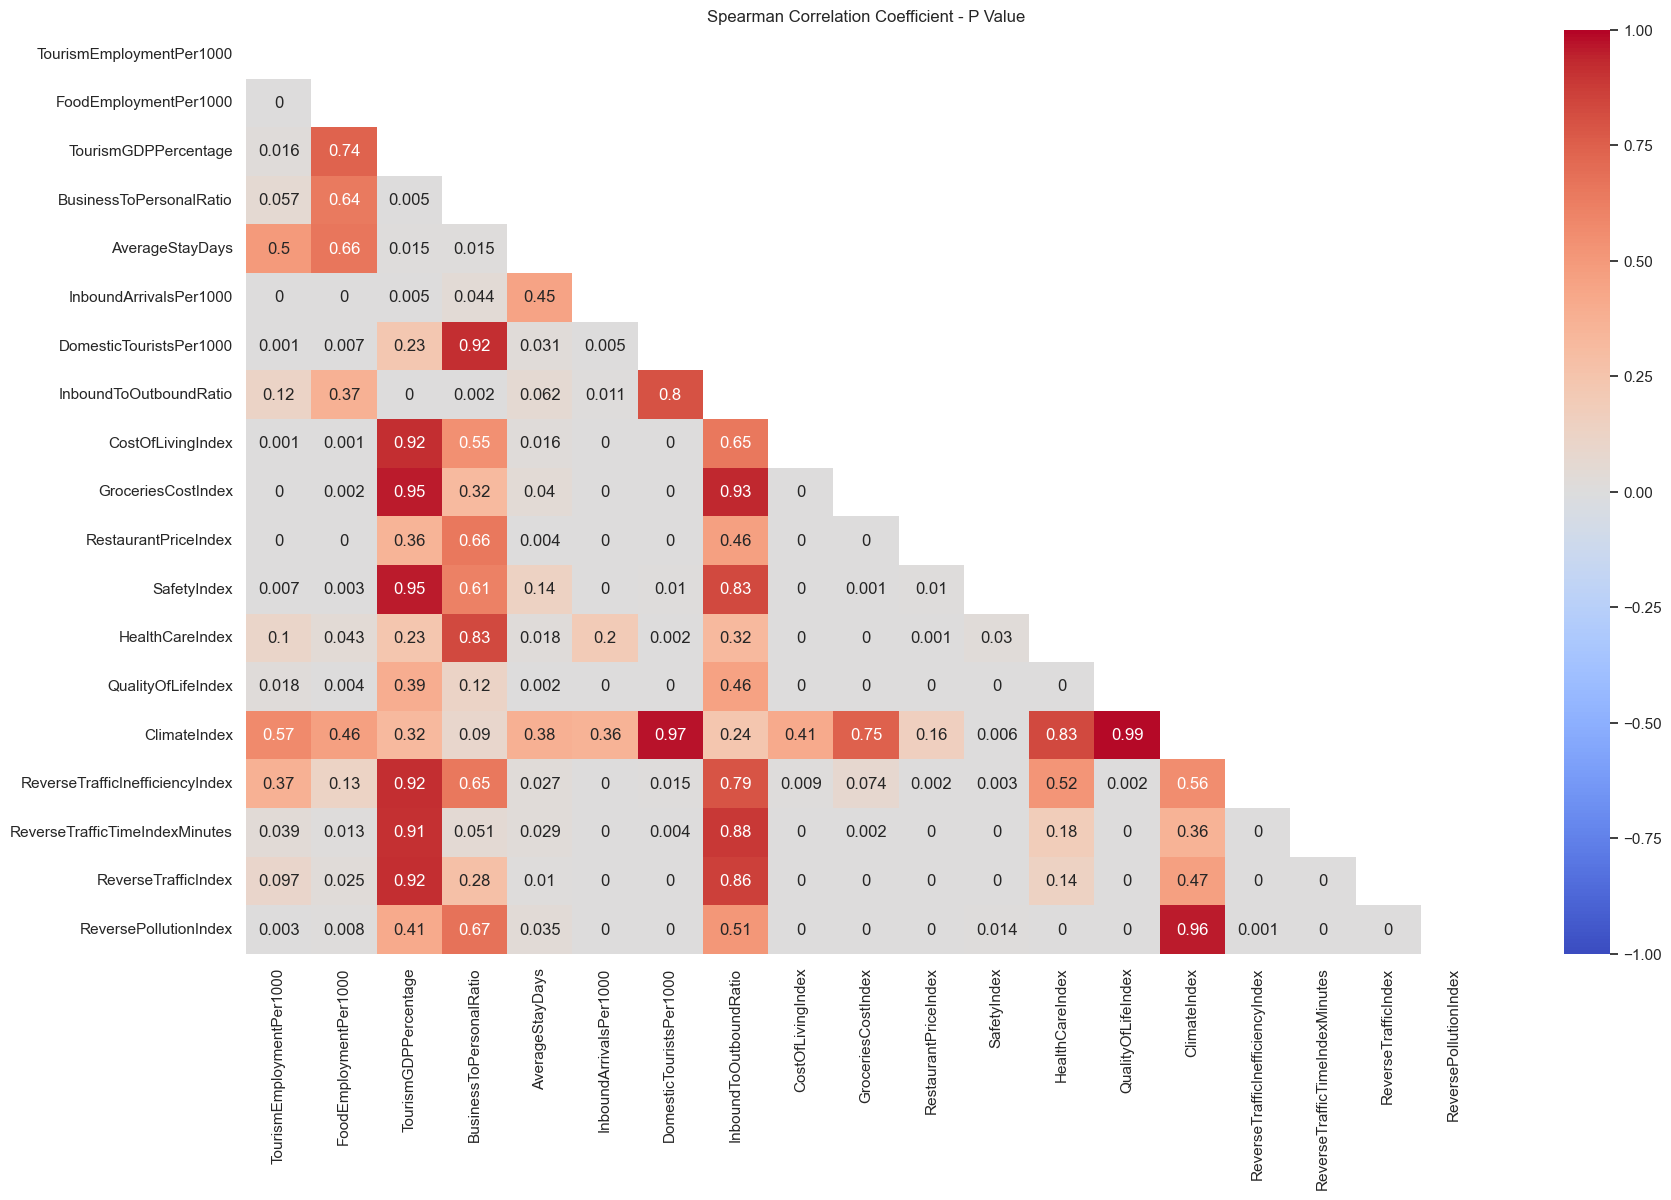

In [91]:
mask_diag = np.eye(len(perm_pval_df), dtype=bool)
mask_upper = np.triu(np.ones_like(perm_pval_df, dtype=bool), k=1)  # upper triangle without diagonal

full_mask =  mask_diag | mask_upper

plt.figure(figsize=(20, 12))
sns.heatmap(perm_pval_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=full_mask)
plt.title('Spearman Correlation Coefficient - P Value')
plt.show()

To make visualizations easier, let's plot only values that represent strong to very strong correlation (0.6 to 1 and -0.6 to -1), and statistical significance(p<0.05).

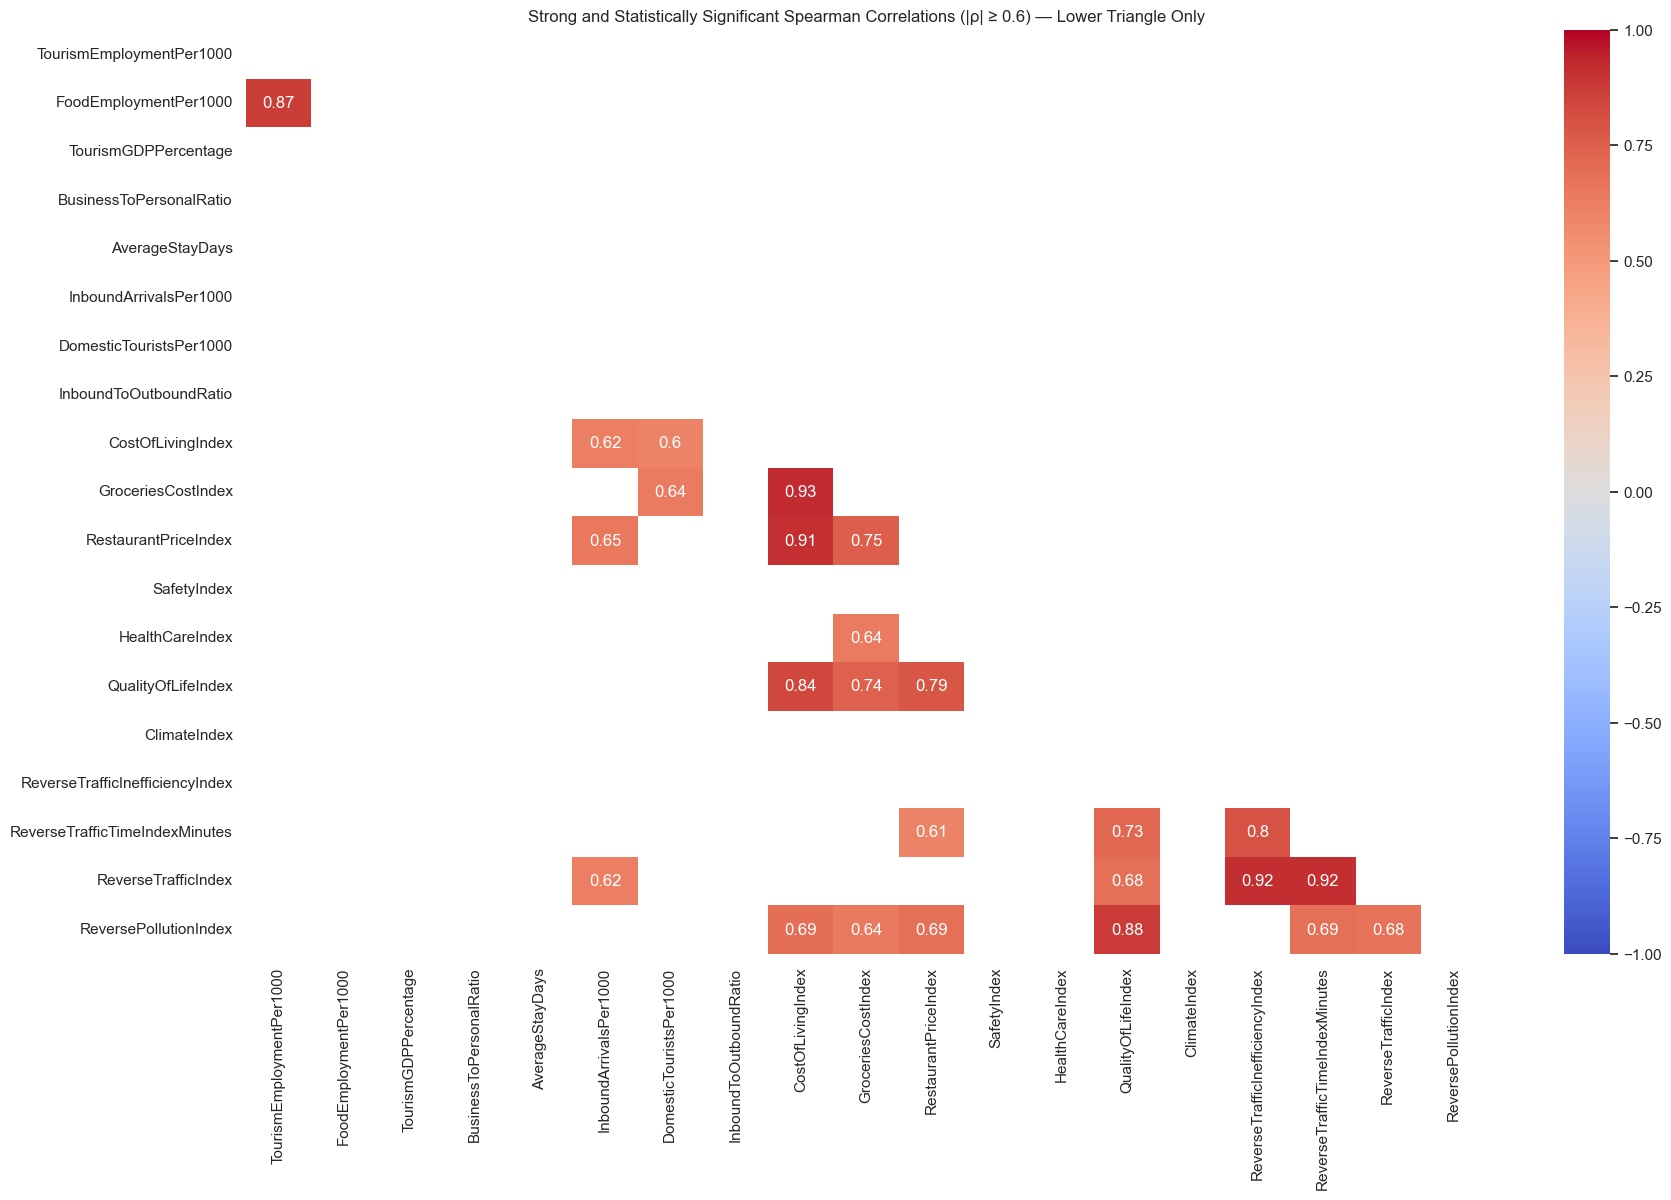

In [92]:

strong_corr = perm_corr_df.copy()

# Create masks
mask_weak = strong_corr.abs() < 0.6  
mask_diag = np.eye(len(strong_corr), dtype=bool)  
mask_upper = np.triu(np.ones_like(strong_corr, dtype=bool), k=1)  # Upper triangle without diagonal
mask_significant = perm_pval_df >= 0.05

full_mask = mask_weak | mask_diag | mask_upper | mask_significant  # Weak correlations, diagonal, upper triangle, and non-significant p-values

plt.figure(figsize=(20, 12))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=full_mask)
plt.title('Strong and Statistically Significant Spearman Correlations (|ρ| ≥ 0.6) — Lower Triangle Only')
plt.show()


Let's look at all statistically significant correlations.

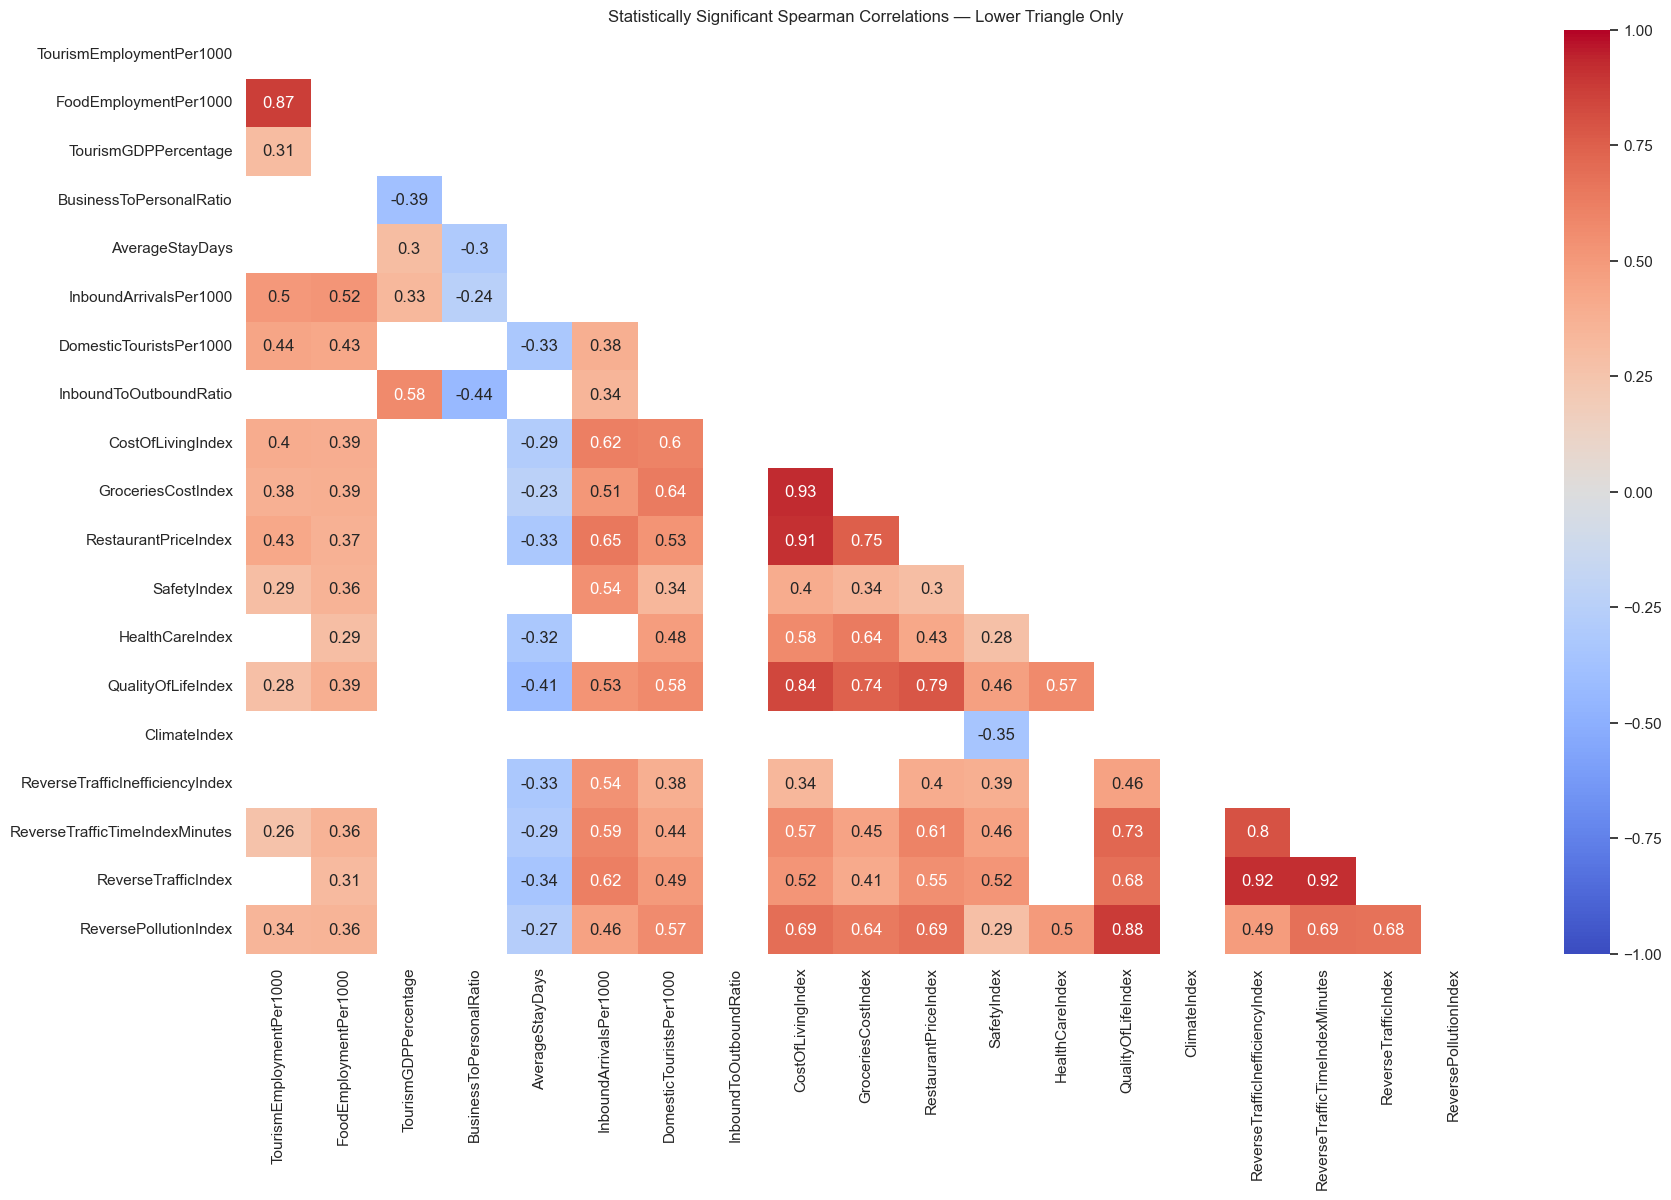

In [96]:

stat_signif_corr = perm_corr_df.copy()

# Create masks
mask_diag = np.eye(len(stat_signif_corr), dtype=bool)  
mask_upper = np.triu(np.ones_like(stat_signif_corr, dtype=bool), k=1)  # Upper triangle without diagonal
mask_significant = perm_pval_df >= 0.05

full_mask =  mask_diag | mask_upper | mask_significant  # Weak correlations, diagonal, upper triangle, and non-significant p-values

plt.figure(figsize=(20, 12))
sns.heatmap(stat_signif_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=full_mask)
plt.title('Statistically Significant Spearman Correlations — Lower Triangle Only')
plt.show()


We notice that InboundToOutboundRatio is not correlated with any other columns, followed by ClimateIndex which is only correlated with SafetyIndex. 

## Imputation & Scaling

We will use maximum-likelihood estimation (MLE) for imputing all missing data, a multivariate imputation approach.

In [97]:
from fancyimpute import IterativeImputer

In [100]:
imputer = IterativeImputer(max_iter=100, random_state=0)

imputed_data = imputer.fit_transform(all_numerical_features_df)

imputed_df = pd.DataFrame(imputed_data, columns=all_numerical_features_df.columns)

print(imputed_df.head())

   TourismEmploymentPer1000  FoodEmploymentPer1000  TourismGDPPercentage  \
0                 15.608840               2.976254              6.475350   
1                  7.411779               3.596785              1.129921   
2                  2.439200               0.710283              3.075387   
3                 28.270541              11.444930              1.890788   
4                 21.464763               7.825559              1.572674   

   BusinessToPersonalRatio  AverageStayDays  InboundArrivalsPer1000  \
0                 0.021680         2.562741             1793.802738   
1                 1.764563         1.621484             -362.819954   
2                 0.111823         4.000000                2.001969   
3                 0.140625         2.552286               16.460292   
4                 0.280377         2.216665              247.324185   

   DomesticTouristsPer1000  InboundToOutboundRatio  CostOfLivingIndex  \
0               433.307621                6

In [104]:
imputed_df.isnull().sum()

TourismEmploymentPer1000           0
FoodEmploymentPer1000              0
TourismGDPPercentage               0
BusinessToPersonalRatio            0
AverageStayDays                    0
InboundArrivalsPer1000             0
DomesticTouristsPer1000            0
InboundToOutboundRatio             0
CostOfLivingIndex                  0
GroceriesCostIndex                 0
RestaurantPriceIndex               0
SafetyIndex                        0
HealthCareIndex                    0
QualityOfLifeIndex                 0
ClimateIndex                       0
ReverseTrafficInefficiencyIndex    0
ReverseTrafficTimeIndexMinutes     0
ReverseTrafficIndex                0
ReversePollutionIndex              0
dtype: int64

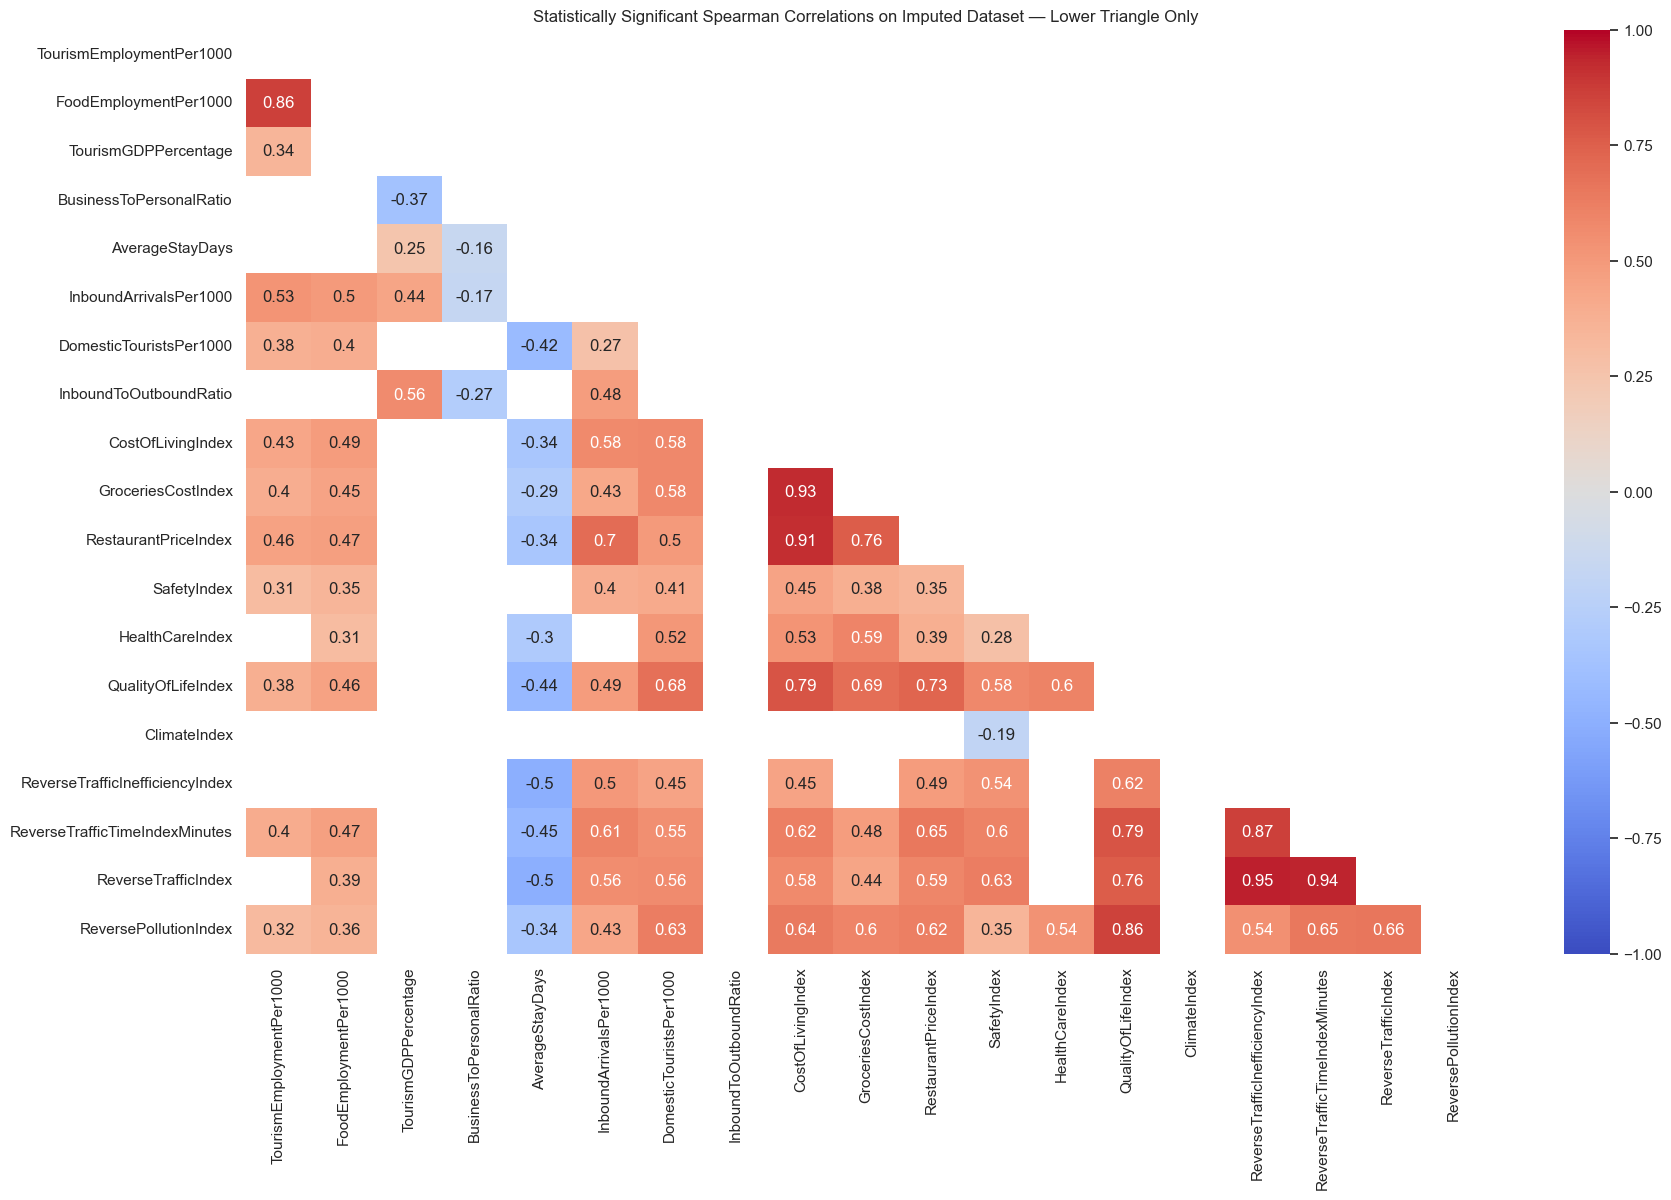

In [112]:

columns = imputed_df.columns
n = len(columns)

# Empty DataFrames
spearman_corr_df_imputed = pd.DataFrame(np.zeros((n, n)), columns=columns, index=columns)

# Compute pairwise correlations
for i in range(n):
    for j in range(n):
        col1 = columns[i]
        col2 = columns[j]
        rho, p = spearmanr(imputed_df[col1], imputed_df[col2], nan_policy='omit')
        spearman_corr_df_imputed.loc[col1, col2] = rho


# Create masks
mask_diag = np.eye(len(spearman_corr_df_imputed), dtype=bool)  
mask_upper = np.triu(np.ones_like(spearman_corr_df_imputed, dtype=bool), k=1)  # Upper triangle without diagonal
mask_significant = perm_pval_df >= 0.05

full_mask =  mask_diag | mask_upper | mask_significant  # Weak correlations, diagonal, upper triangle, and non-significant p-values

plt.figure(figsize=(20, 12))
sns.heatmap(spearman_corr_df_imputed, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=full_mask)
plt.title('Statistically Significant Spearman Correlations on Imputed Dataset — Lower Triangle Only')
plt.show()

Let's check if we affected feature correlation by imputing values.

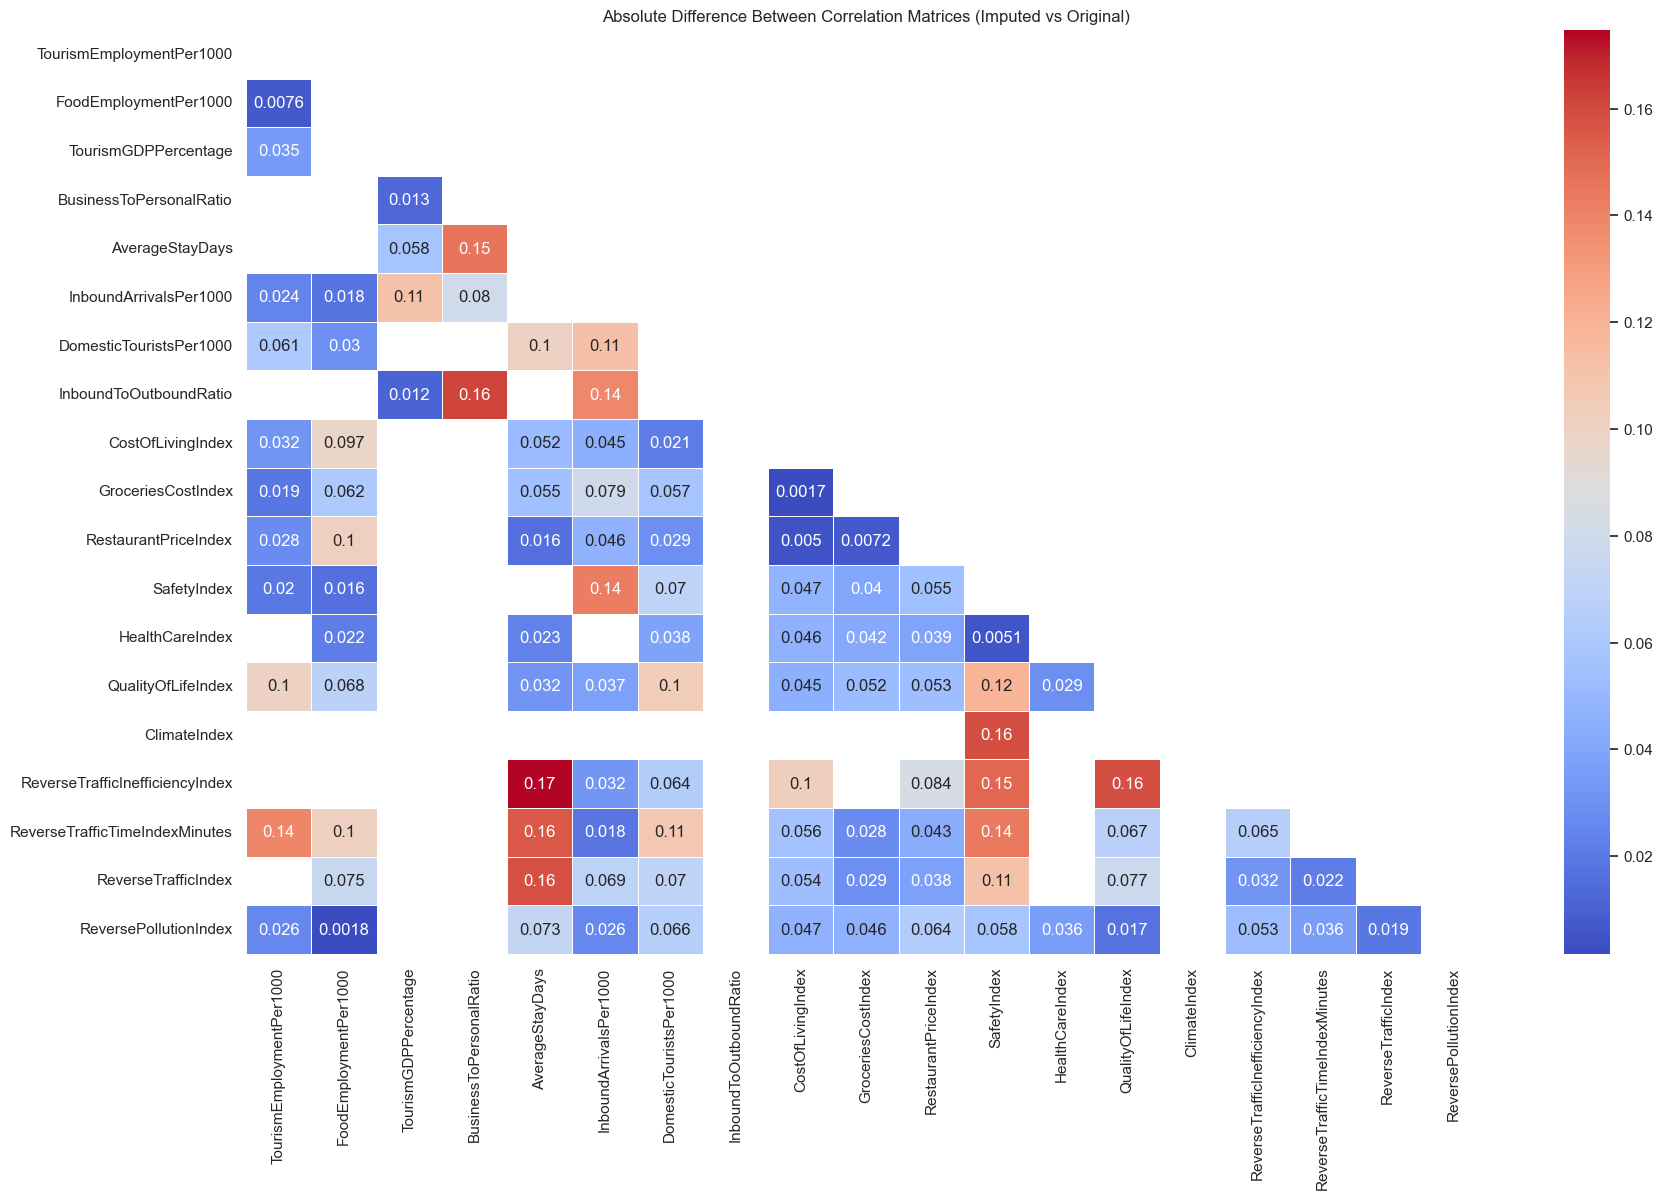

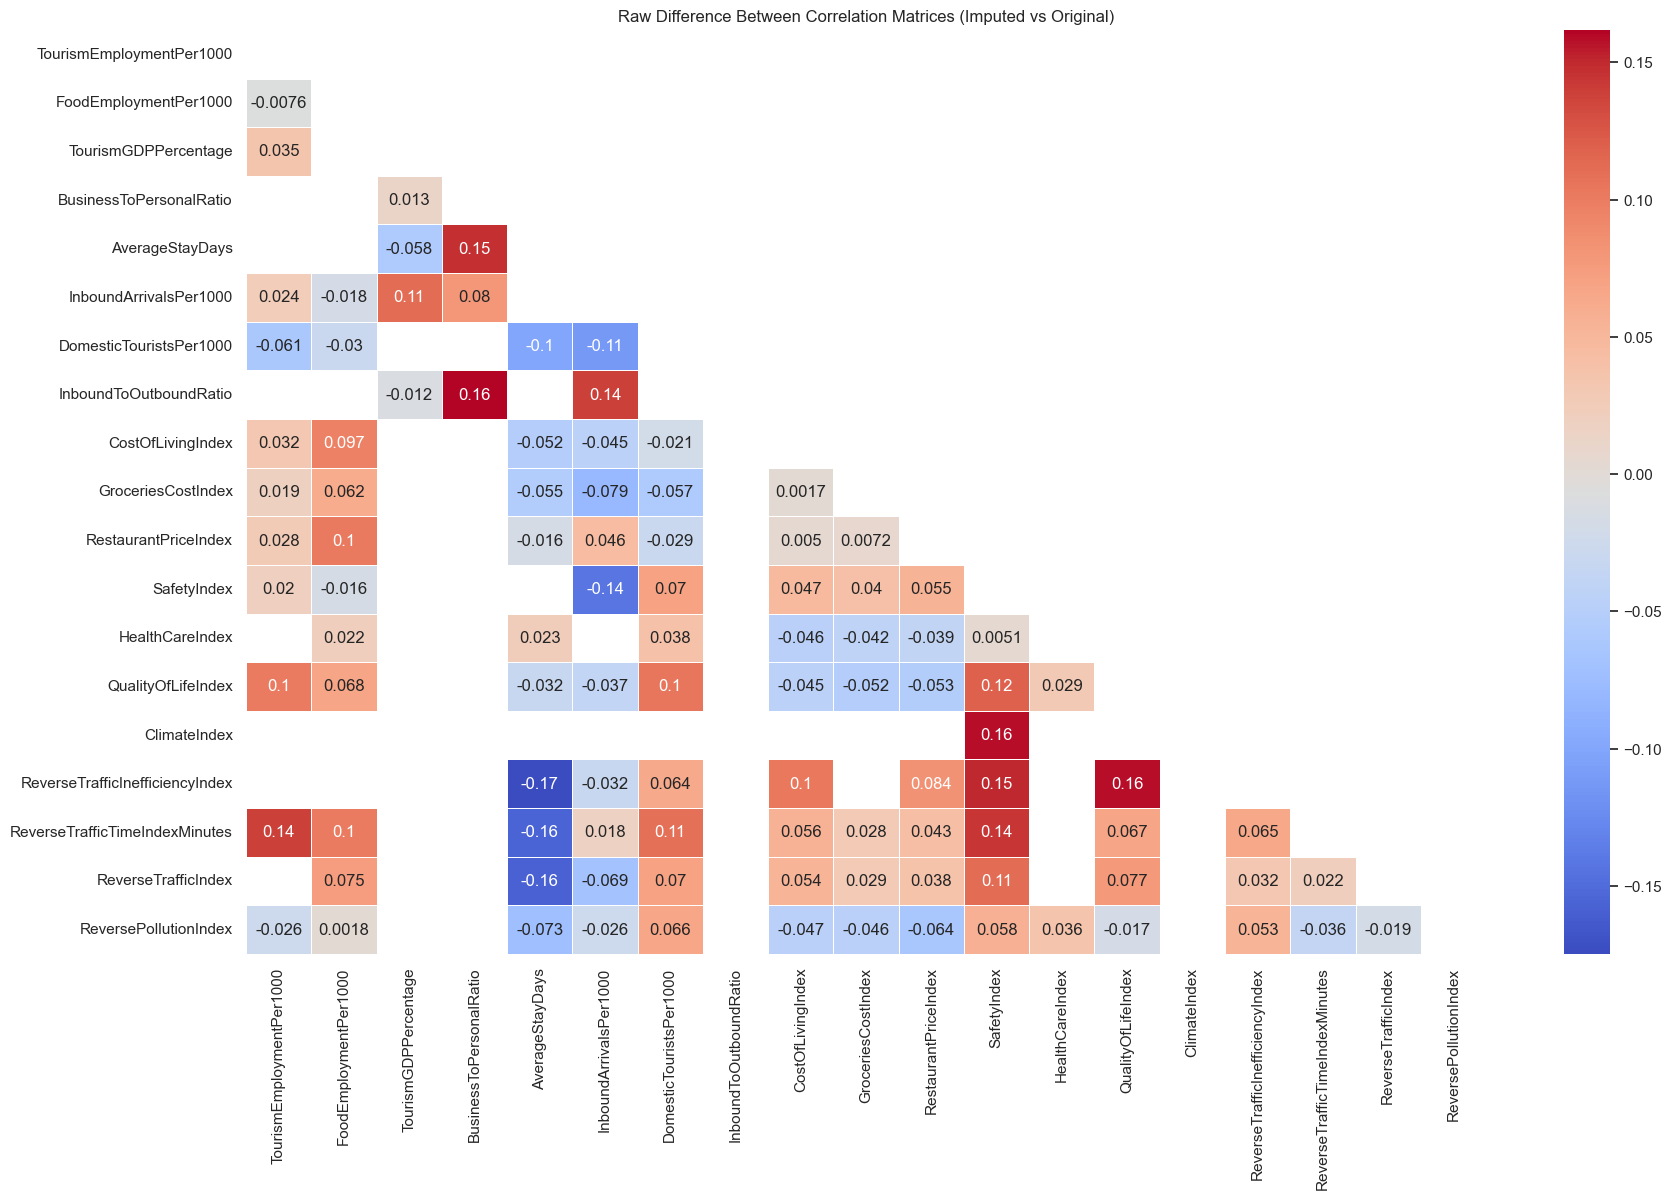

In [114]:


corr_diff = spearman_corr_df_imputed - perm_corr_df

abs_corr_diff = corr_diff.abs()

plt.figure(figsize=(20, 12))
sns.heatmap(abs_corr_diff, annot=True, cmap='coolwarm', linewidths=0.5, mask=full_mask)
plt.title('Absolute Difference Between Correlation Matrices (Imputed vs Original)')
plt.show()


# You can also visualize the raw differences (without the absolute values)
plt.figure(figsize=(20, 12))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', linewidths=0.5, mask=full_mask)
plt.title('Raw Difference Between Correlation Matrices (Imputed vs Original)')
plt.show()


Some correlations were modified but we can assume the majority of these were not significant. We can come back to this if we want to try other imputation techniques later.

In [117]:
from scipy.stats import ttest_rel

significant_original = perm_corr_df.values[~full_mask]
significant_imputed = spearman_corr_df_imputed.values[~full_mask]

# Perform a paired t-test on the significant correlations
t_stat, p_values = ttest_rel(significant_original, significant_imputed)

# Create a DataFrame of p-values for easier inspection
p_value_df = pd.DataFrame(p_values, columns=perm_corr_df.columns, index=perm_corr_df.columns)

# Display the p-values
print("P-values from paired t-test for statistically significant correlations:")
print(p_value_df)

# Mask where p-values are significant (p < 0.05)
significant_mask = p_value_df < 0.05

# Print the significant p-values (p < 0.05)
print("Significant p-values (p < 0.05):")
print(p_value_df[significant_mask])

P-values from paired t-test for statistically significant correlations:
                                 TourismEmploymentPer1000  \
TourismEmploymentPer1000                         0.013617   
FoodEmploymentPer1000                            0.013617   
TourismGDPPercentage                             0.013617   
BusinessToPersonalRatio                          0.013617   
AverageStayDays                                  0.013617   
InboundArrivalsPer1000                           0.013617   
DomesticTouristsPer1000                          0.013617   
InboundToOutboundRatio                           0.013617   
CostOfLivingIndex                                0.013617   
GroceriesCostIndex                               0.013617   
RestaurantPriceIndex                             0.013617   
SafetyIndex                                      0.013617   
HealthCareIndex                                  0.013617   
QualityOfLifeIndex                               0.013617   
ClimateIndex 

The t-test shows that the change is statistically significant in terms of randomness. However for simplicity reasons we will ignore this for now :).

Scaling the columns that don't already have 0 to 100 range.

In [141]:
scaler = MinMaxScaler(feature_range=(0, 100))  # Scaling to the range 0-100

subset = imputed_df[["TourismEmploymentPer1000","FoodEmploymentPer1000", "TourismGDPPercentage","BusinessToPersonalRatio","AverageStayDays","InboundArrivalsPer1000","DomesticTouristsPer1000","InboundToOutboundRatio","QualityOfLifeIndex", "ReverseTrafficInefficiencyIndex","ReverseTrafficIndex"]]

# Fit and transform the data to scale all features to 0-100
scaled_data = scaler.fit_transform(subset)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=subset.columns)

In [142]:
columns_not_in_scaled = [col for col in imputed_df.columns if col not in scaled_df.columns]

final_modified_dataset = pd.concat([df[["CountryName", "CountryCode"]], scaled_df, imputed_df[columns_not_in_scaled] ], axis=1)

In [144]:
final_modified_dataset.to_csv('../data/final_cleaned_dataset.csv')